# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
- Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. 
For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. 
The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Import a Dataset
df=pd.read_excel(r'C:\Users\admin\Documents\Data Science\Assignment\Clustering\EastWest_Airlines.xlsx')
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [10]:
#Calculate a shape
df.shape

(3999, 12)

In [11]:
#Check a data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [15]:
#Desciptive Statestics
df.describe().T

count          mean            std  min      25%      50%  \
ID#                3999.0   2014.819455    1160.764358  1.0   1010.5   2016.0   
Balance            3999.0  73601.327582  100775.664958  0.0  18527.5  43097.0   
Qual_miles         3999.0    144.114529     773.663804  0.0      0.0      0.0   
cc1_miles          3999.0      2.059515       1.376919  1.0      1.0      1.0   
cc2_miles          3999.0      1.014504       0.147650  1.0      1.0      1.0   
cc3_miles          3999.0      1.012253       0.195241  1.0      1.0      1.0   
Bonus_miles        3999.0  17144.846212   24150.967826  0.0   1250.0   7171.0   
Bonus_trans        3999.0     11.601900       9.603810  0.0      3.0     12.0   
Flight_miles_12mo  3999.0    460.055764    1400.209171  0.0      0.0      0.0   
Flight_trans_12    3999.0      1.373593       3.793172  0.0      0.0      0.0   
Days_since_enroll  3999.0   4118.559390    2065.134540  2.0   2330.0   4096.0   
Award?             3999.0      0.370343       0.482957  0.0      0.0      0.0   

                       75%        max  
ID#                 3020.5     4021.0  
Balance            92404.0  1704838.0  
Qual_miles             0.0    11148.0  
cc1_miles              3.0        5.0  
cc2_miles              1.0        3.0  
cc3_miles              1.0        5.0  
Bonus_miles        23800.5   263685.0  
Bonus_trans           17.0       86.0  
Flight_miles_12mo    311.0    30817.0  
Flight_trans_12        1.0       53.0  
Days_since_enroll   5790.5     8296.0  
Award?                 1.0        1.0

# Exploratory data analysis (EDA)
- Check for Duplicated
- check for missing values
- Rename the column if necessory
- Distribution of Numerical features.
- outlier detection

In [13]:
#Check for Duplicated
df.duplicated().sum()

0

In [14]:
#check for missing values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [21]:
#Rename the column
df.rename(columns={'ID#':'ID', 'Award?': 'Award'}, inplace=True)

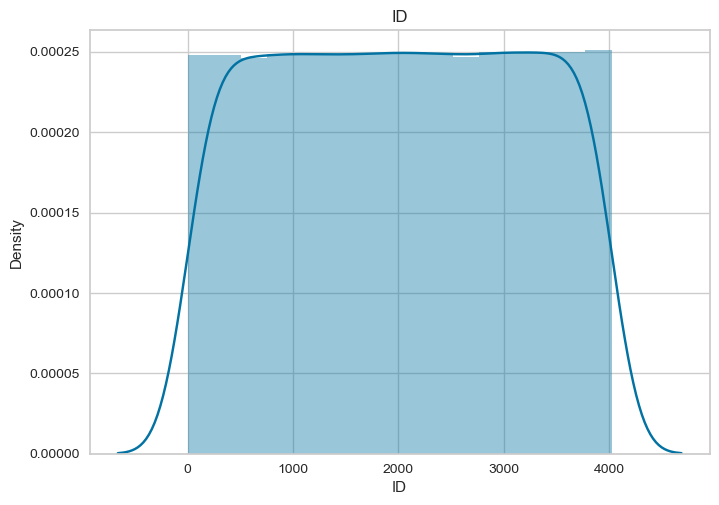

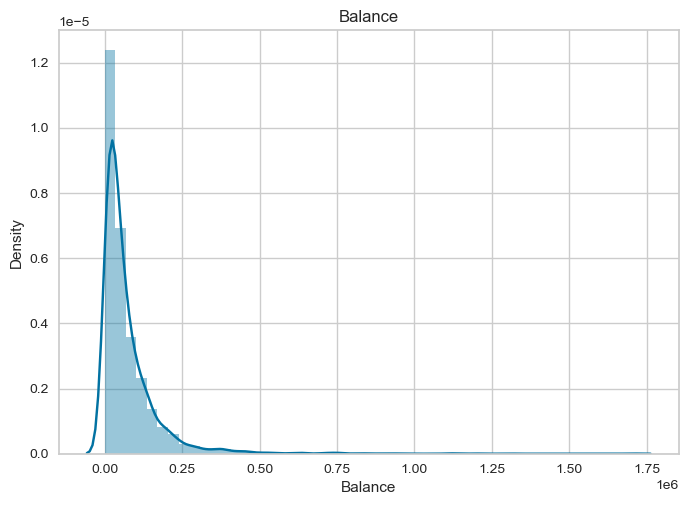

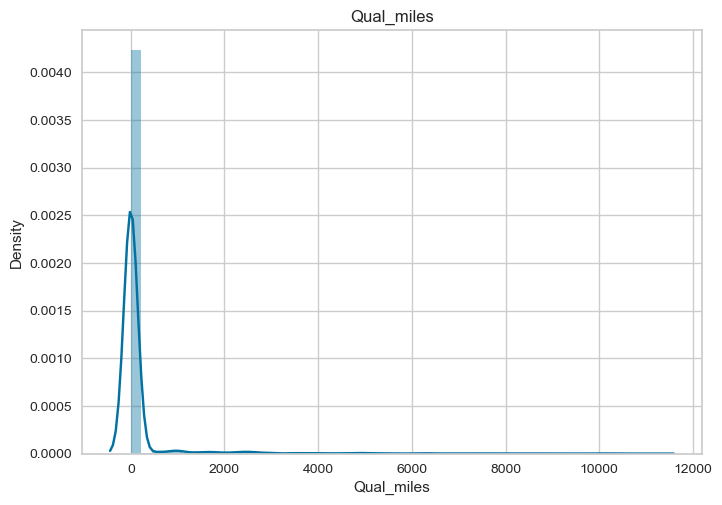

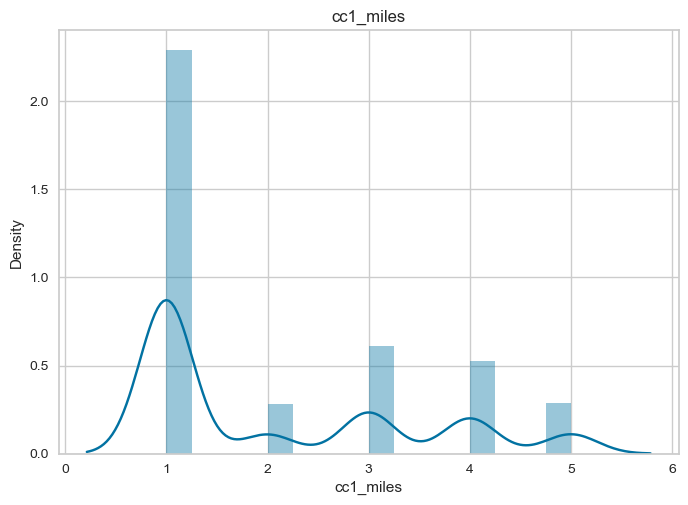

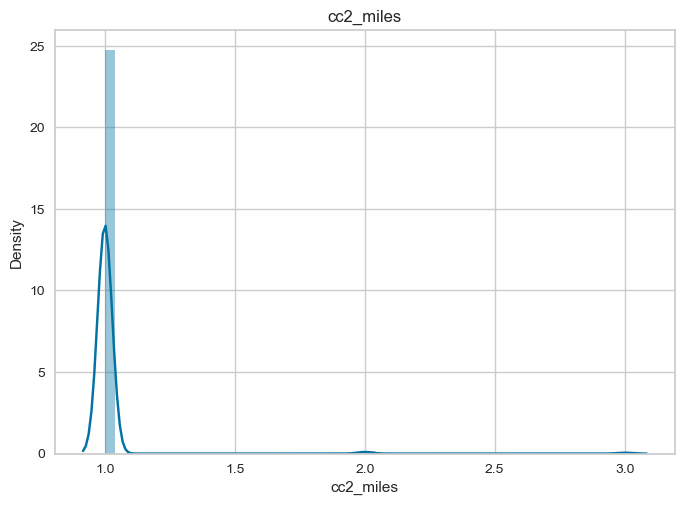

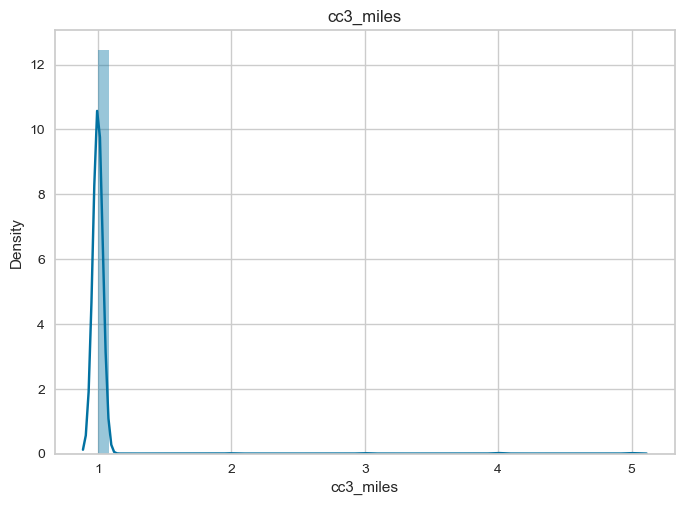

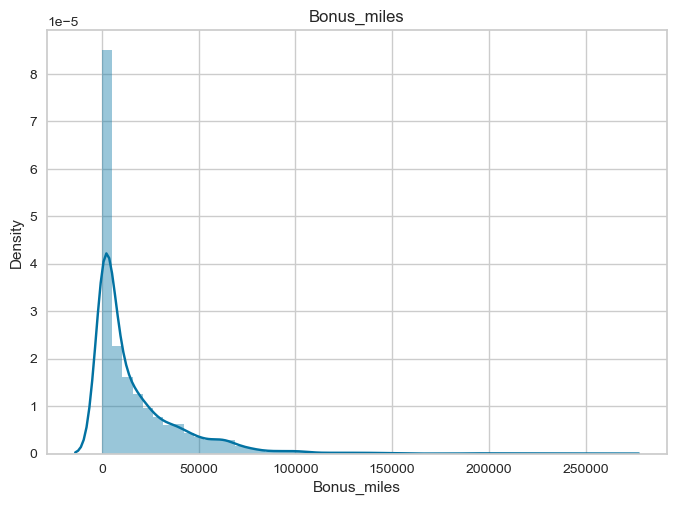

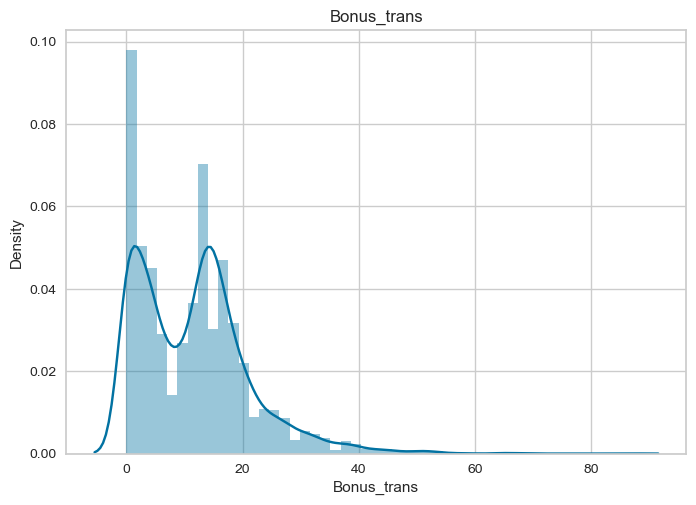

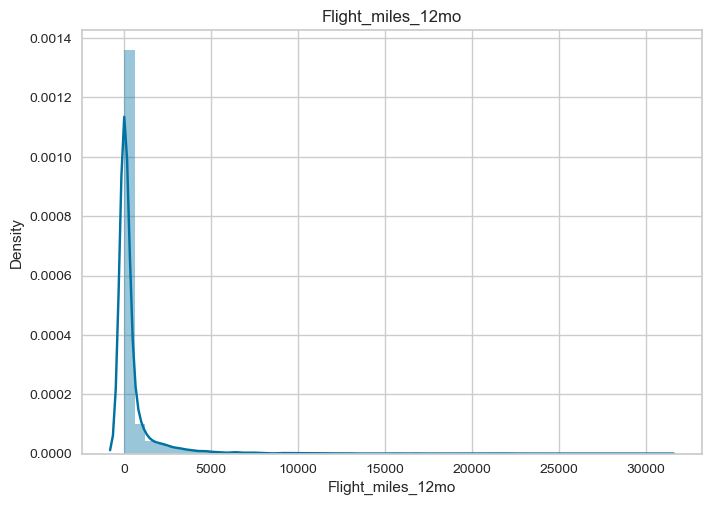

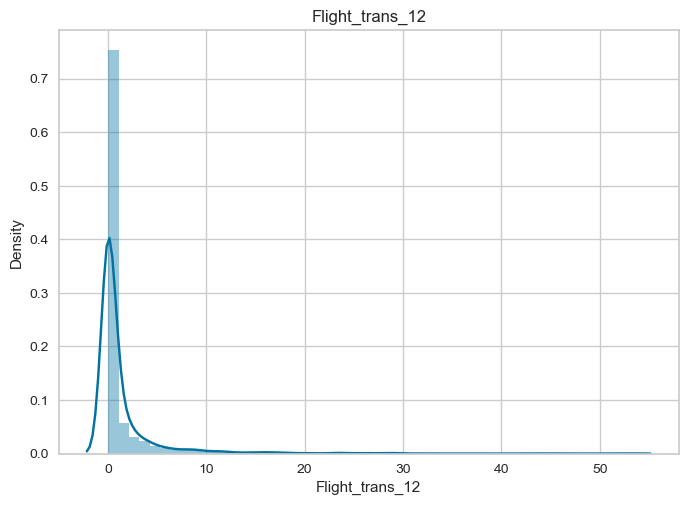

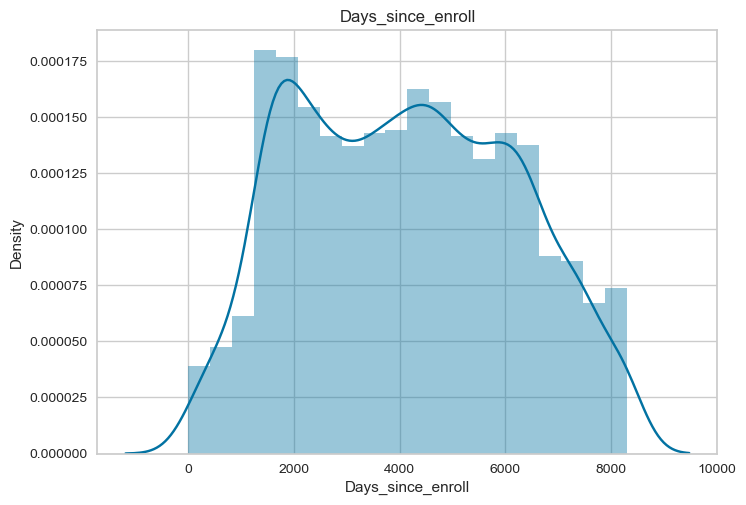

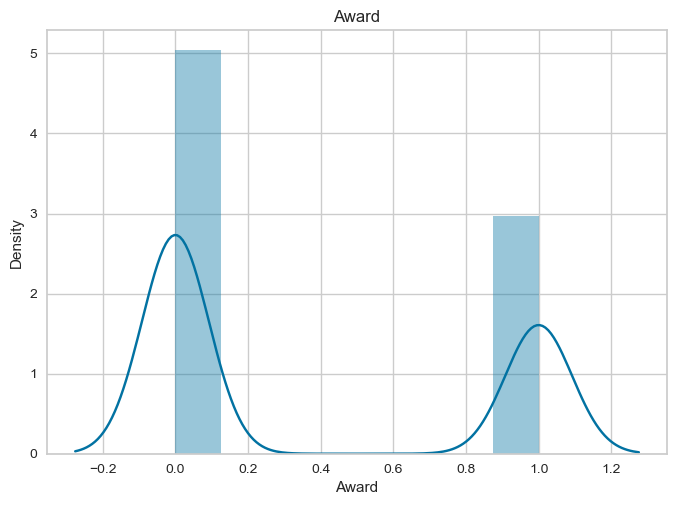

In [24]:
#Distribution of Numerical features.
df1=df.copy()
for feature in data:
    sns.distplot(df1[feature])
    plt.title(feature)
    plt.show()

- Almost all parameters are not distibuted equally, all have a skewness. 
- Outliers are presents in each and every features.

In [25]:
df.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

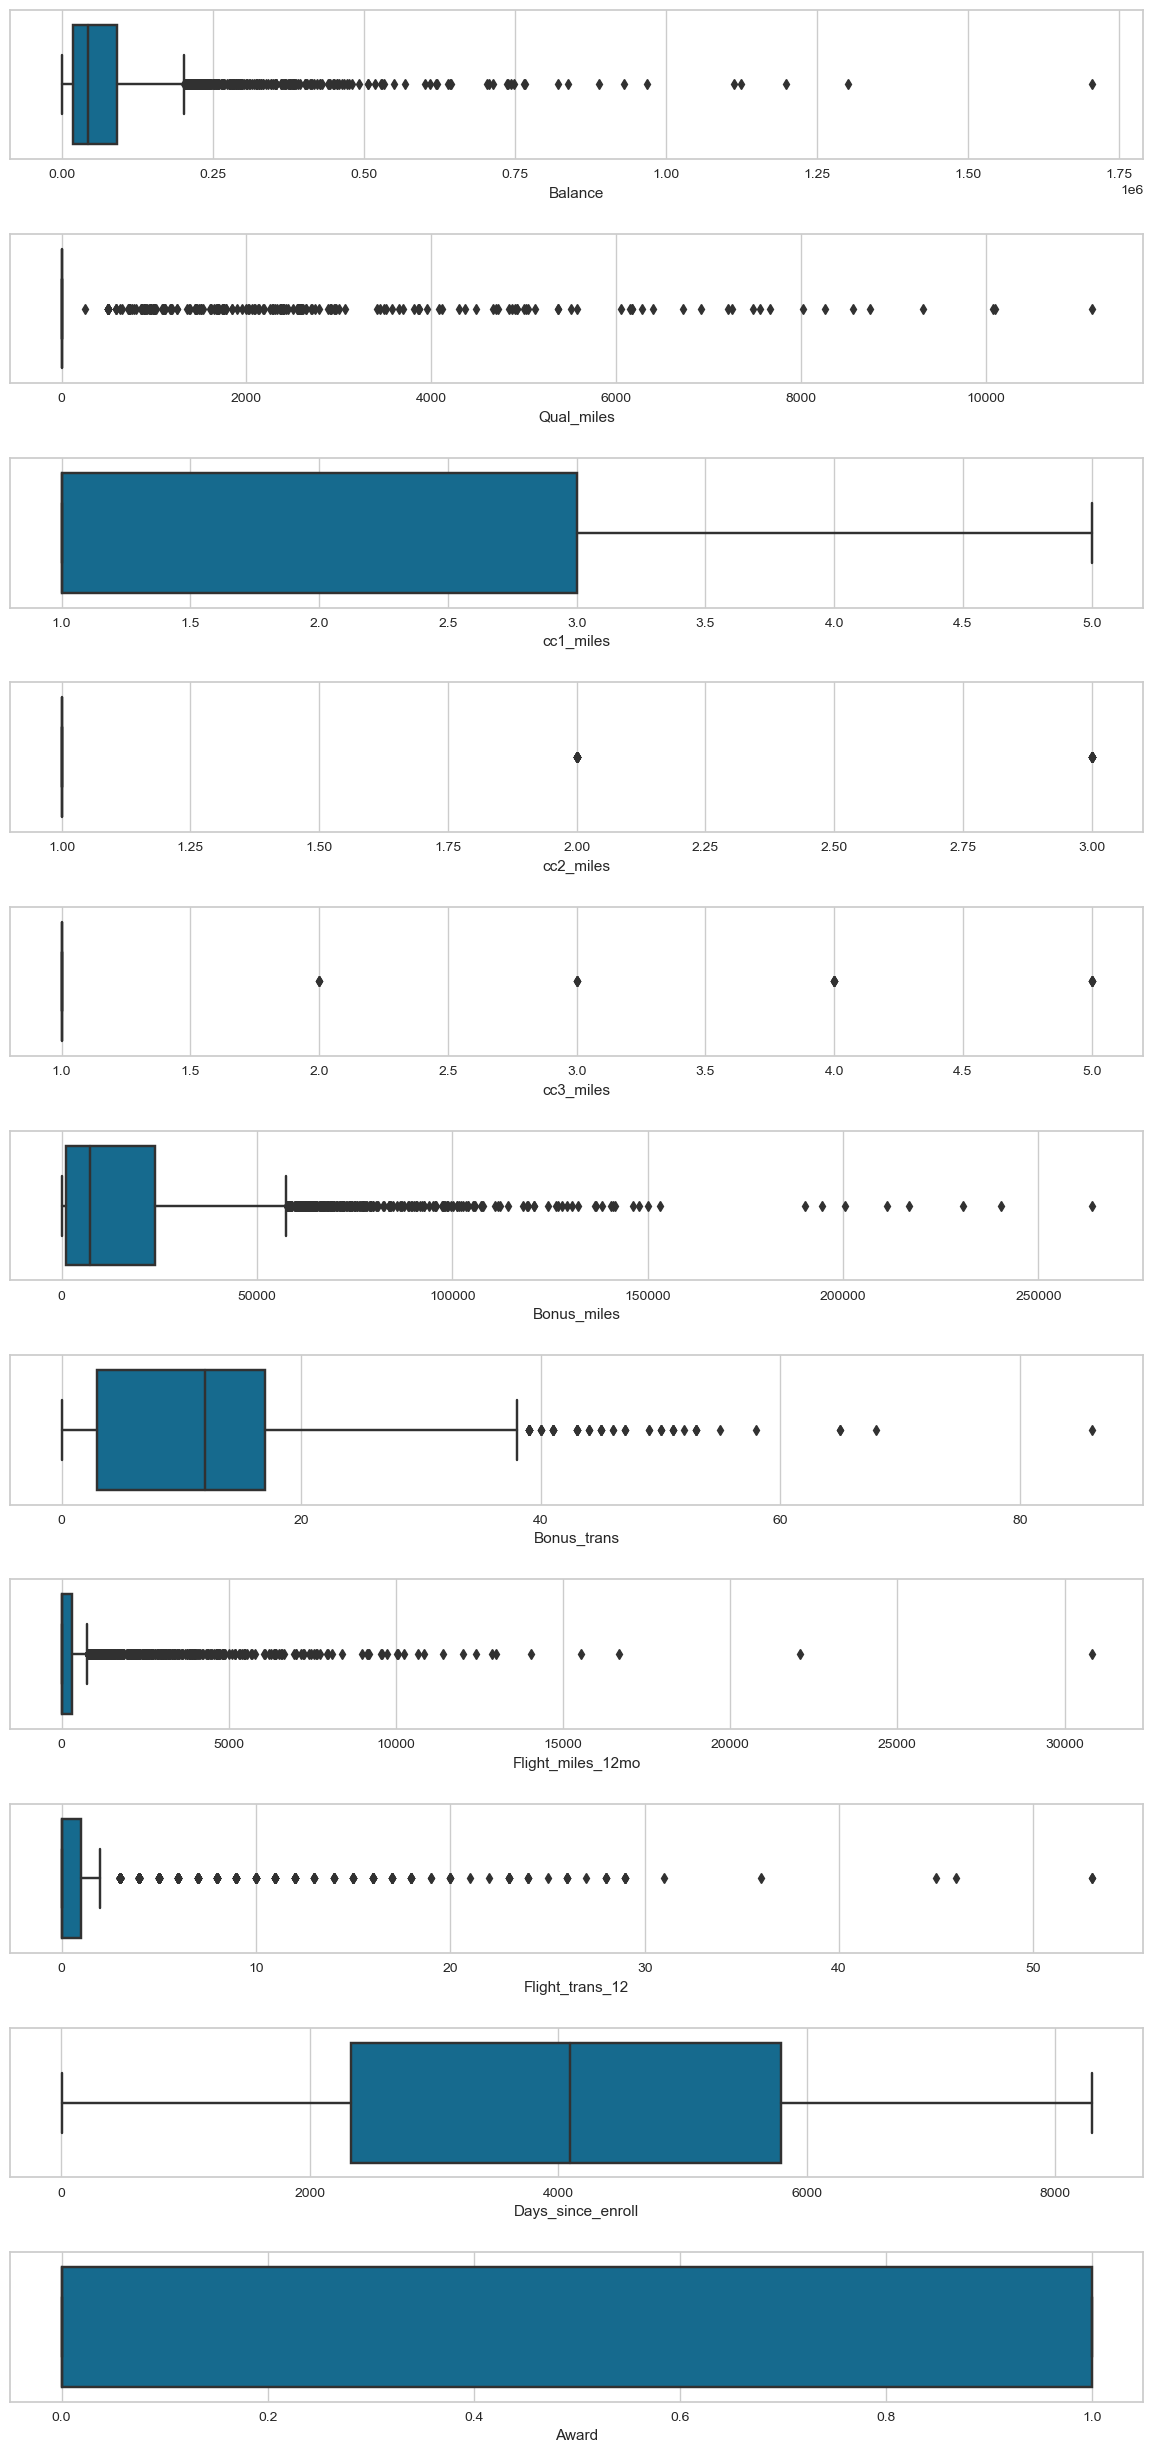

In [35]:
#outlier detection
ot_df=df.copy()
fig, axes=plt.subplots(11,1, figsize=(12,25))
sns.boxplot(x='Balance', data=ot_df,ax=axes[0])
sns.boxplot(x='Qual_miles', data=ot_df,ax=axes[1])
sns.boxplot(x='cc1_miles', data=ot_df,ax=axes[2])
sns.boxplot(x='cc2_miles', data=ot_df,ax=axes[3])
sns.boxplot(x='cc3_miles', data=ot_df,ax=axes[4])
sns.boxplot(x='Bonus_miles', data=ot_df,ax=axes[5])
sns.boxplot(x='Bonus_trans', data=ot_df,ax=axes[6])
sns.boxplot(x='Flight_miles_12mo', data=ot_df,ax=axes[7])
sns.boxplot(x='Flight_trans_12', data=ot_df,ax=axes[8])
sns.boxplot(x='Days_since_enroll', data=ot_df,ax=axes[9])
sns.boxplot(x='Award', data=ot_df,ax=axes[10])
plt.tight_layout(pad=2.0)
plt.show()

- Outliers are present on all features except cc1_miles,Days_since_enroll and Award.

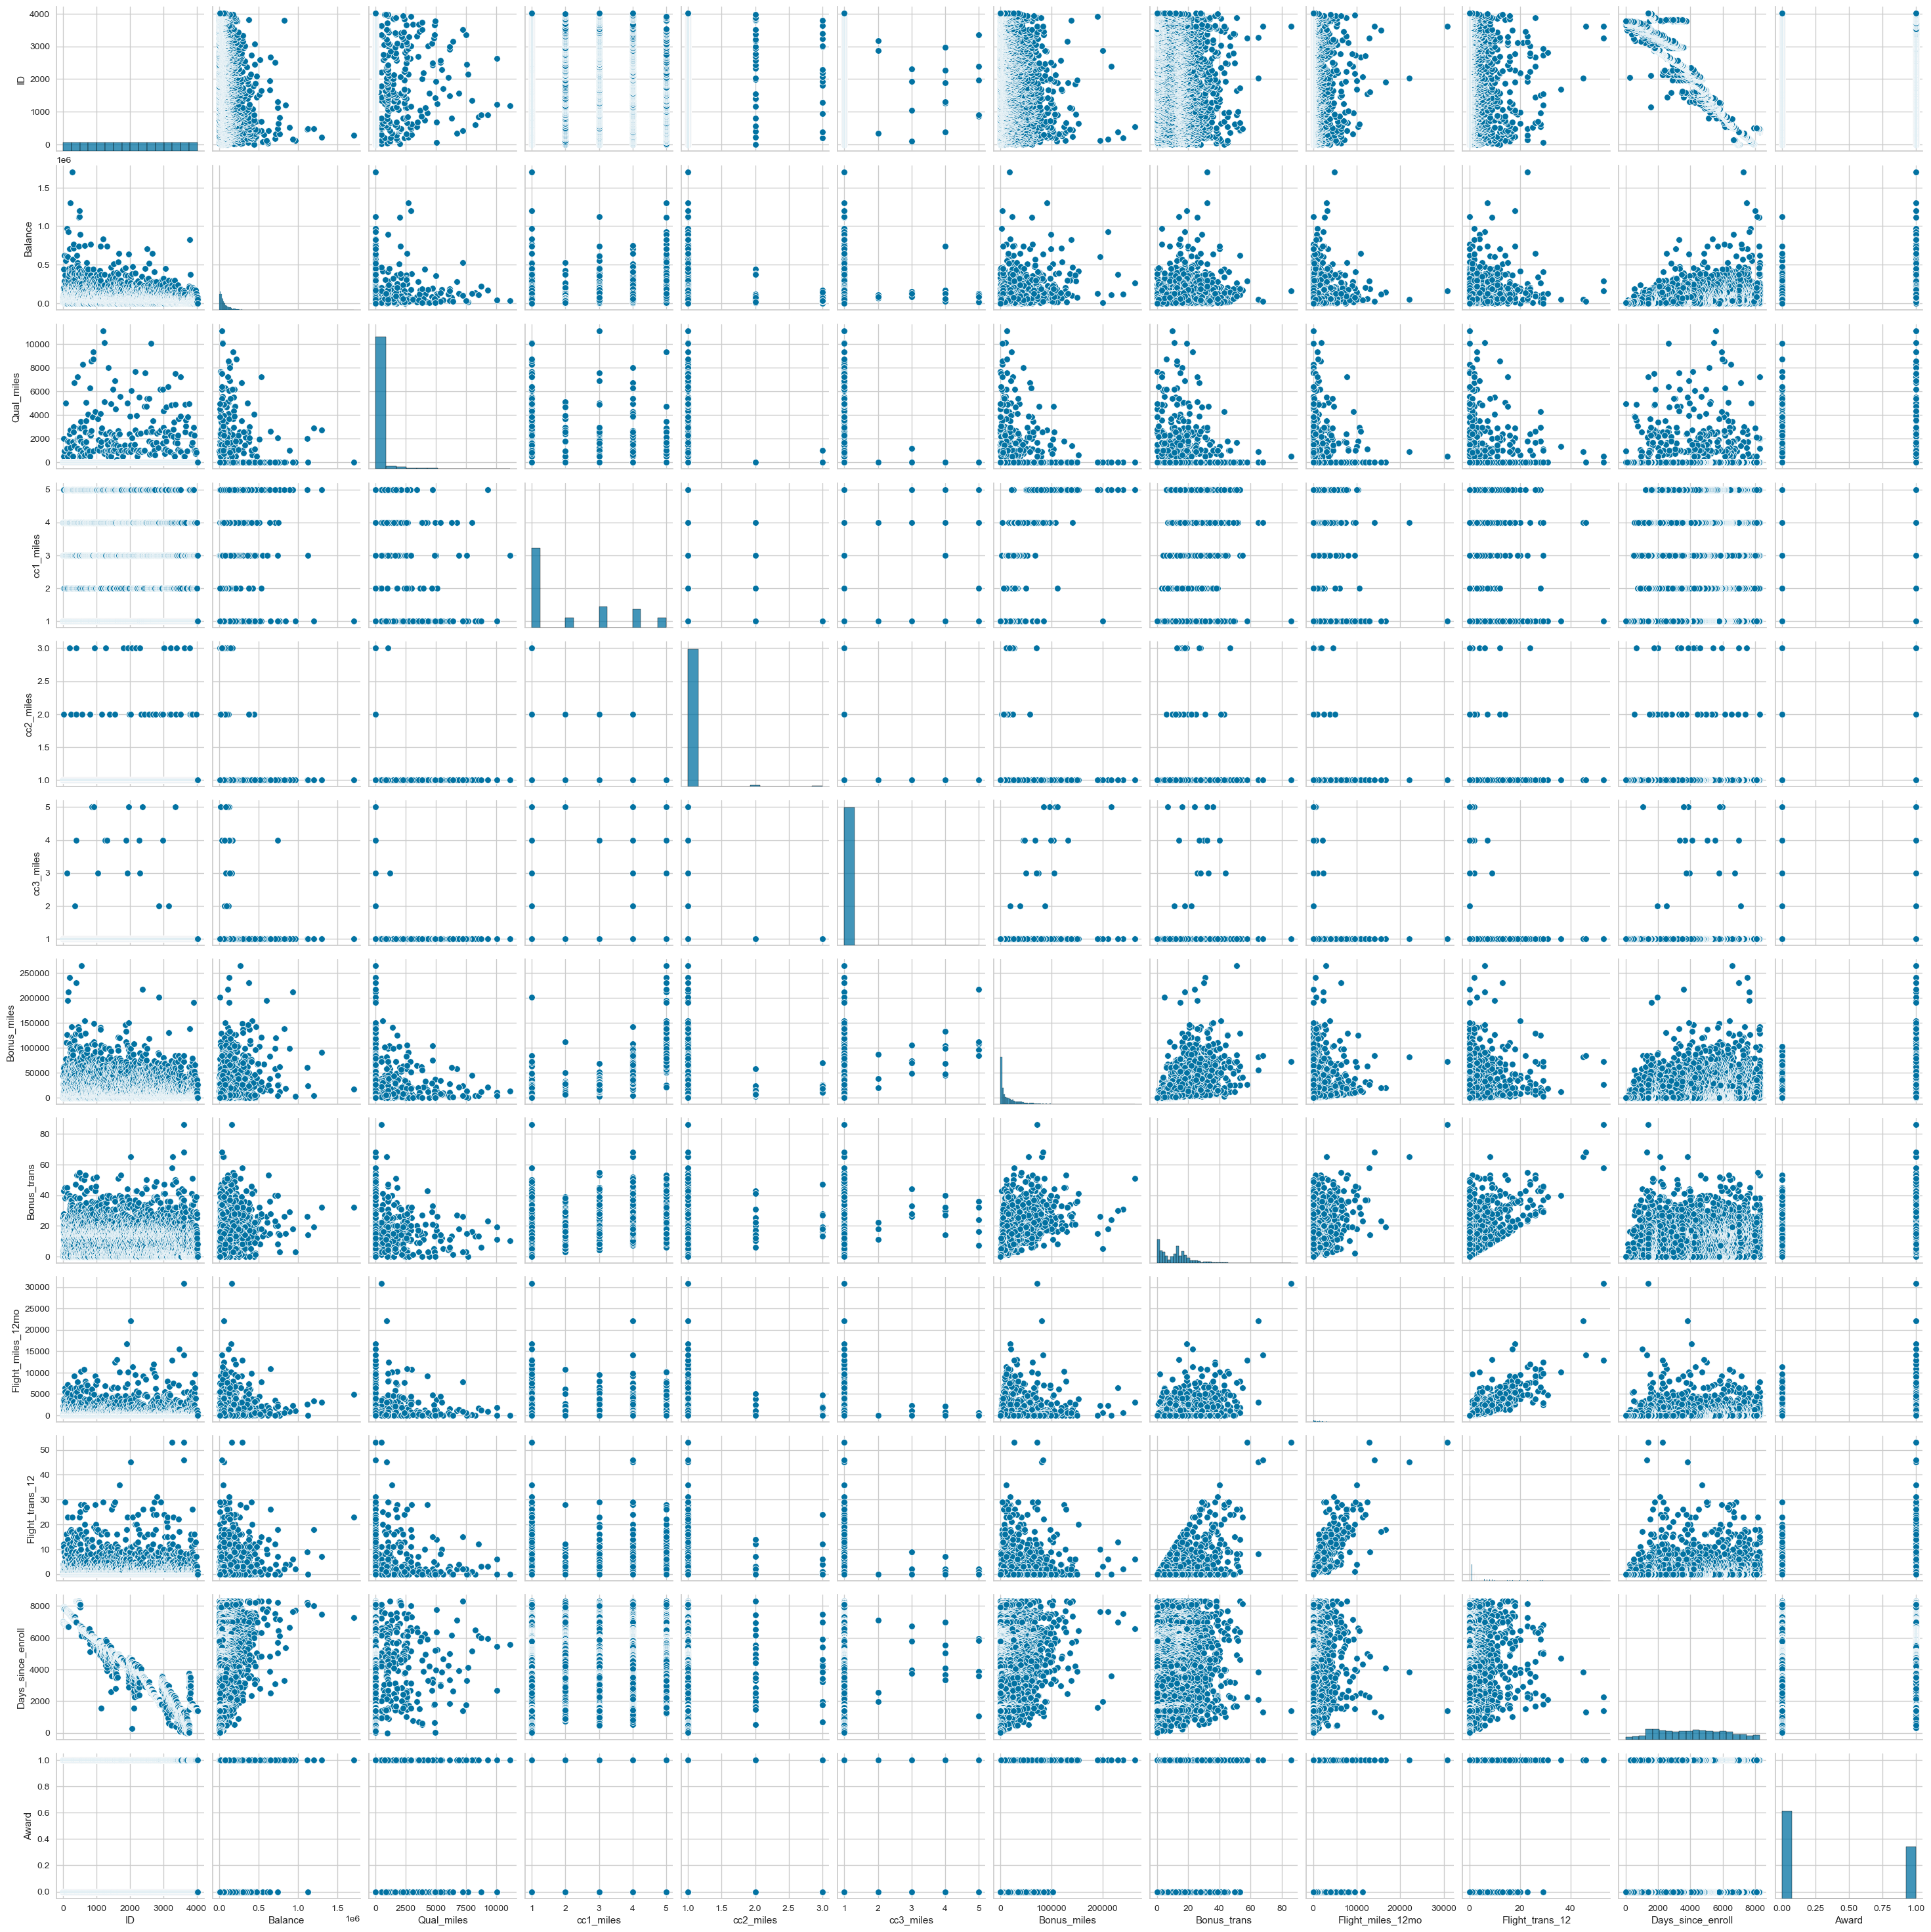

In [36]:
#Plot a Pairplot to see the outiers.
sns.pairplot(df)

# Feature Engineering
- Drop unwanted columns
- feature scaling

In [37]:
#Drop Unwanted column:
x=df.drop(columns=['ID'])
x

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  
0         0  
1         0  
2         0  
3         0  
4         1  
...     ...  
3994      1  
3995      1  
3996      1  
3997      0  
3998      0  

[3999 rows x 11 columns]

In [38]:
#feature scaling
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# 1. Hierarchical Clustering

In [41]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

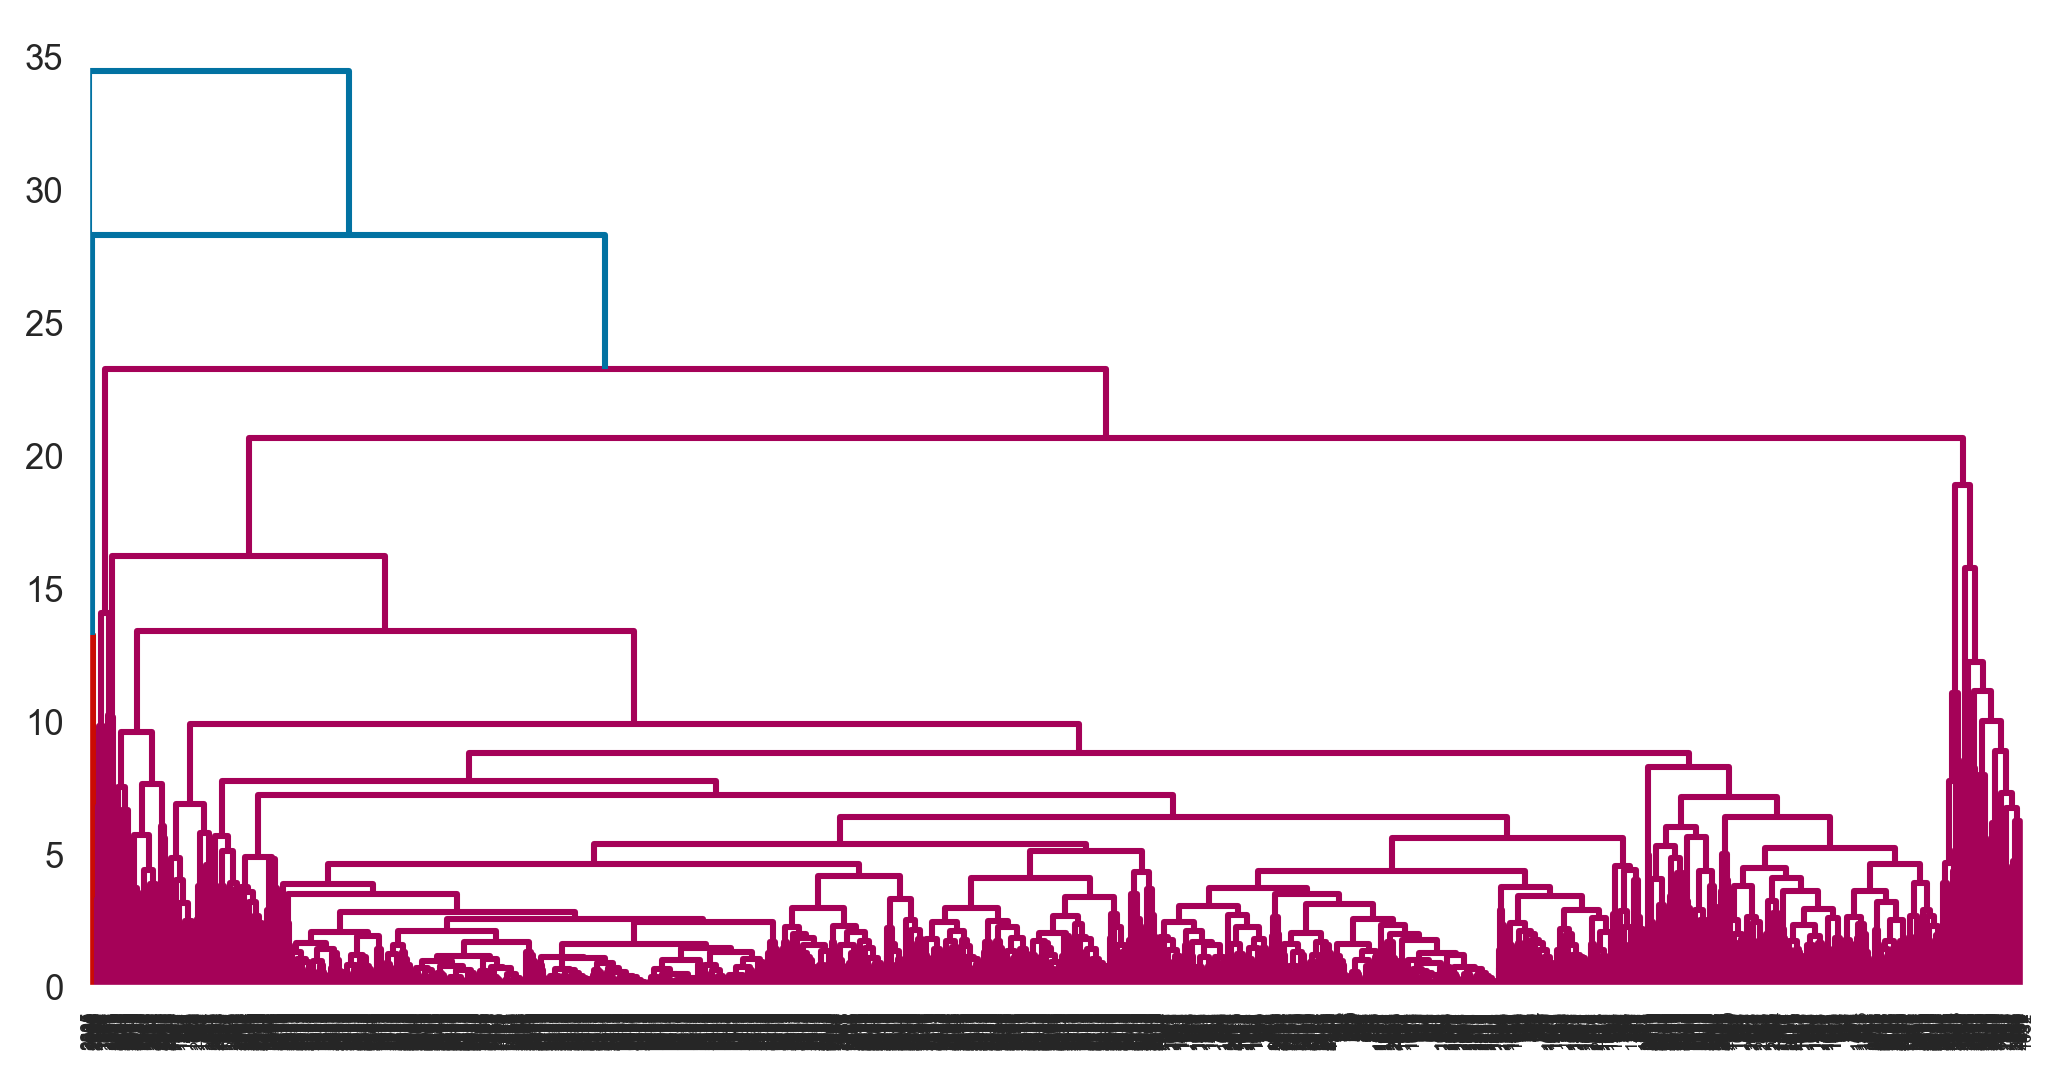

In [42]:
lk=hierarchy.linkage(x,method='complete')
dendrogram=hierarchy.dendrogram(lk)

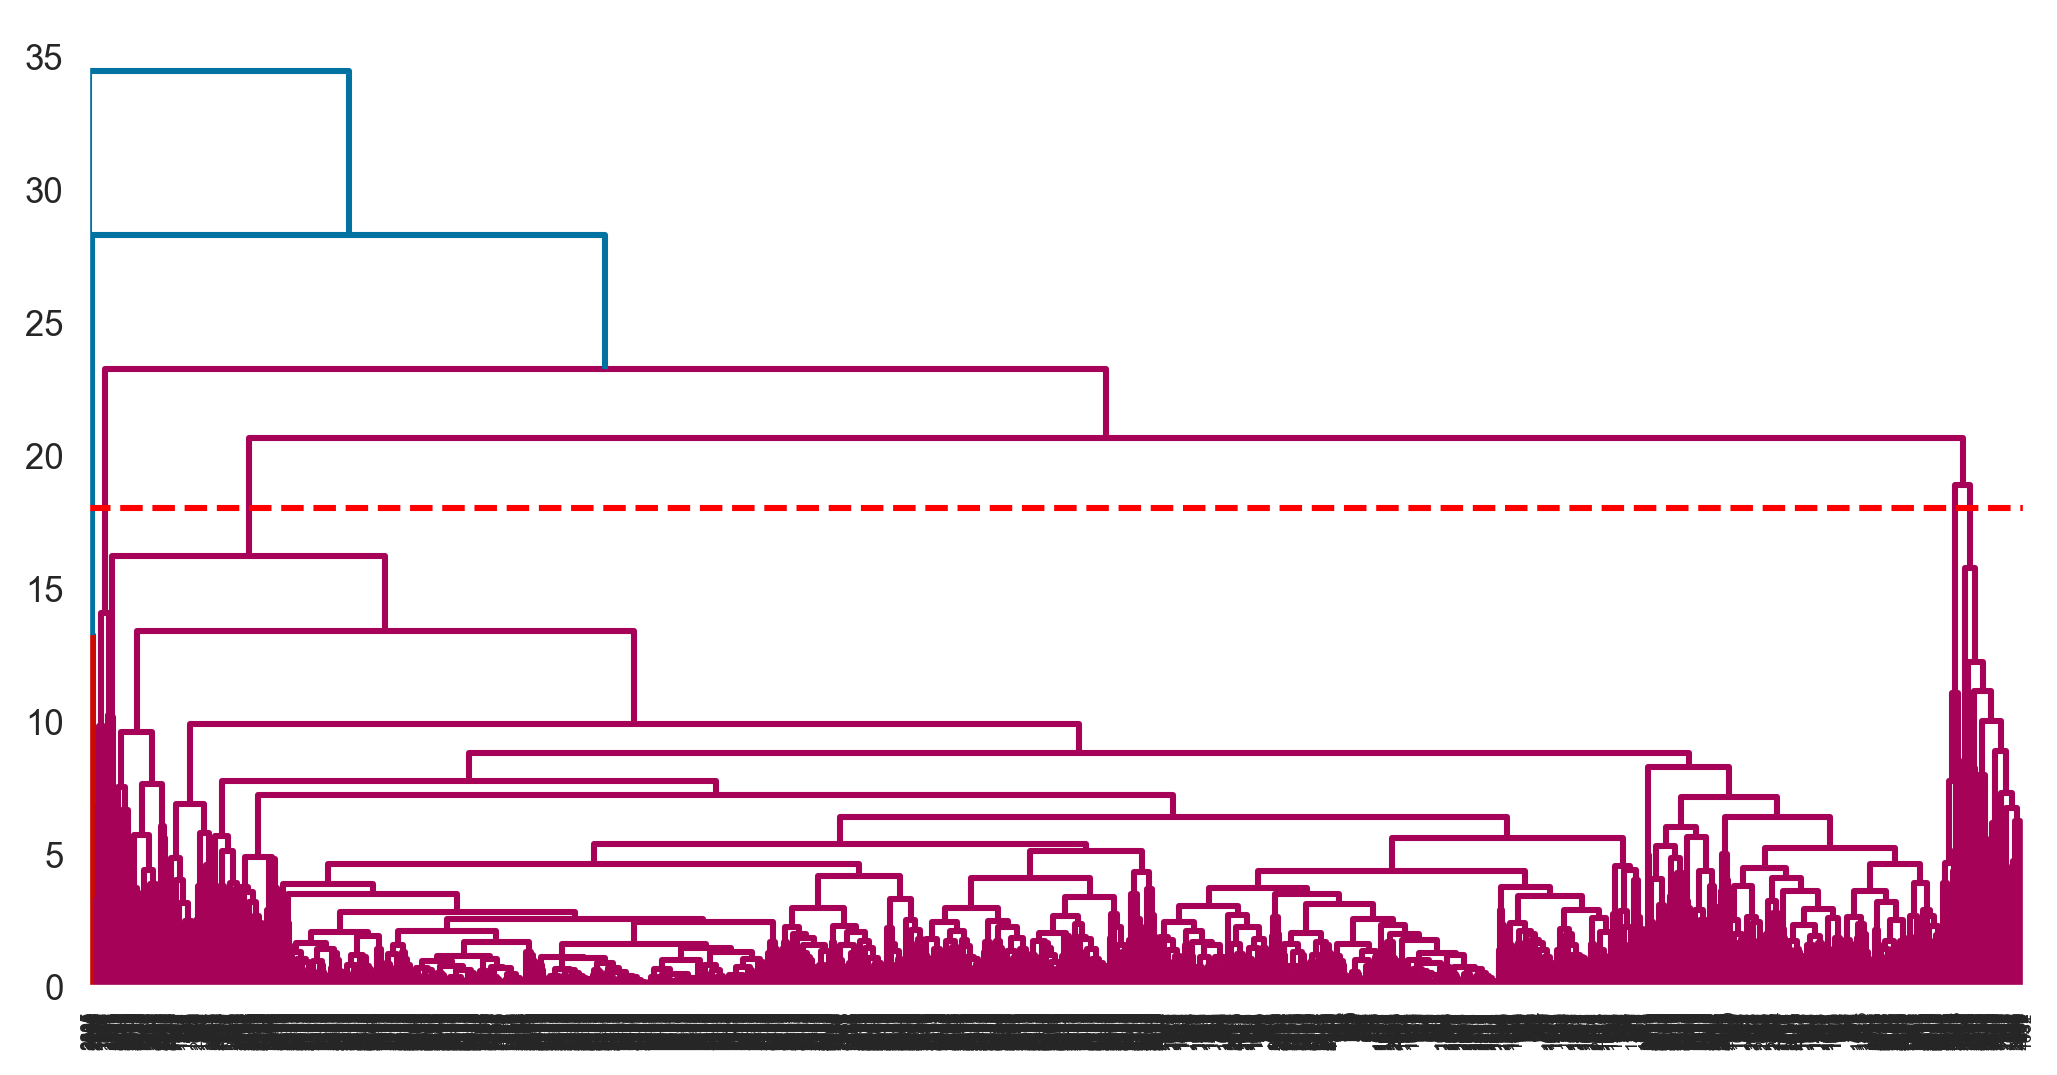

In [47]:
lk=hierarchy.linkage(x,method='complete')
dendrogram=hierarchy.dendrogram(lk)
plt.axhline(y=18,c='red', linestyle='--')

- We will build the model with 4 clusters

In [46]:
#Create a model with 4 cristal
hc=AgglomerativeClustering(n_clusters=4)
y=hc.fit_predict(x)
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [56]:
df1['Cluster_hc']=y
df1

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  Cluster  Cluster_hc  
0         0        1           1  
1         0        1           1  
2         0        1           1  
3         0        1           1  
4         1        0           0  
...     ...      ...         ...  
3994      1        1           1  
3995      1        1           1  
3996      1        0           0  
3997      0        1           1  
3998      0        1           1  

[3999 rows x 14 columns]

In [57]:
silhouette_score(x,y)

0.30814152852022786

<AxesSubplot:xlabel='Balance', ylabel='Days_since_enroll'>

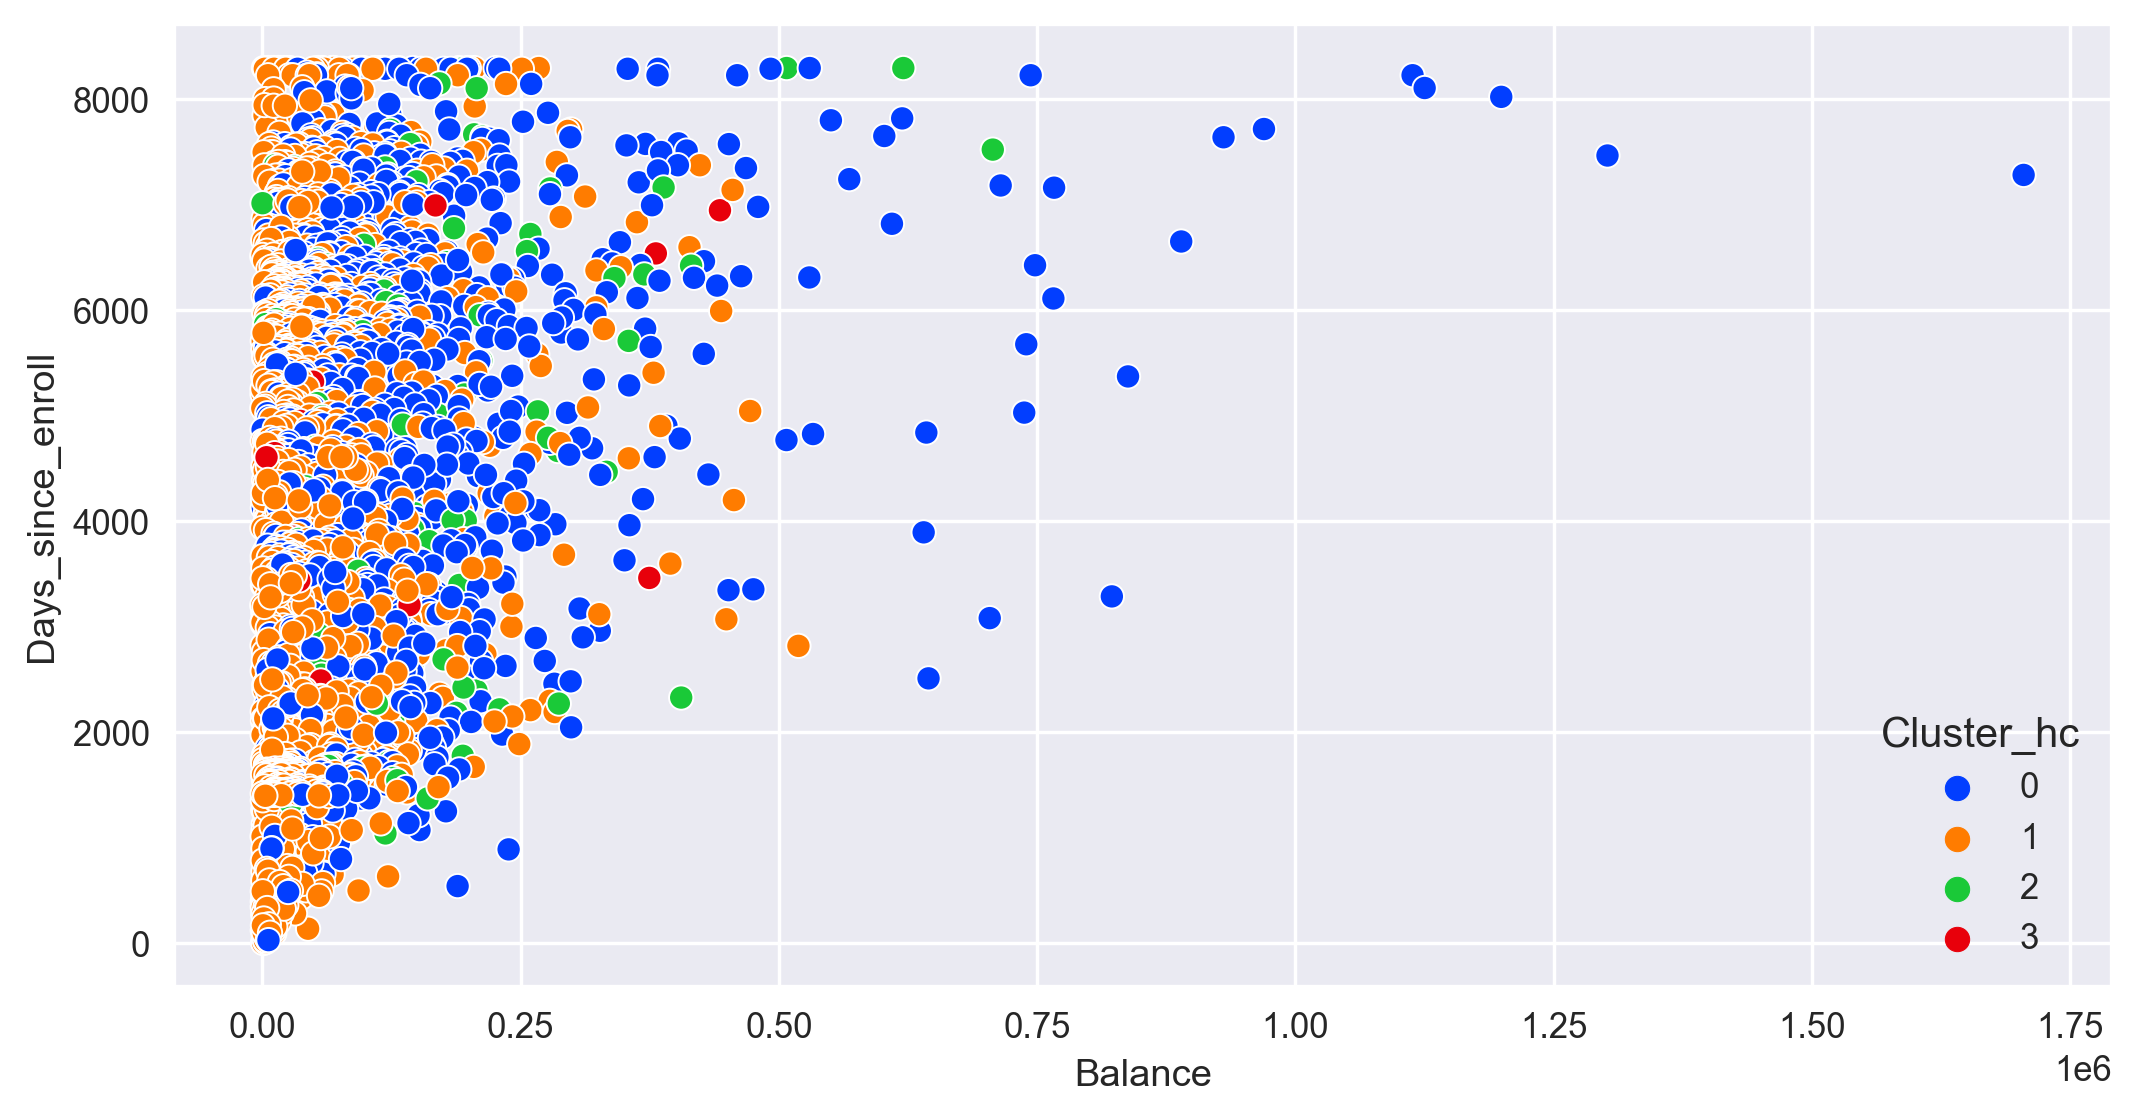

In [58]:
sns.scatterplot(df1['Balance'], df1['Days_since_enroll'],hue=df1['Cluster_hc'], palette='bright')

# 2. Kmeans
- Before creating the model by KMeans we will find out the optimum number of cristal by Elbow Graph

In [51]:
wcss=[]
for i in range(1,20):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [52]:
wcss

[43988.999999999985,
 35409.516629861304,
 30900.33909202892,
 27153.920642155466,
 24883.892073473708,
 22586.0324025241,
 18891.78672300184,
 17316.753604356494,
 15960.406001471118,
 14732.22988234744,
 13705.544027986018,
 12946.953651755677,
 12429.59772997639,
 11972.492636329496,
 11527.199695186182,
 11050.410322972017,
 10850.555360125238,
 10344.026861801703,
 10111.867015894544]

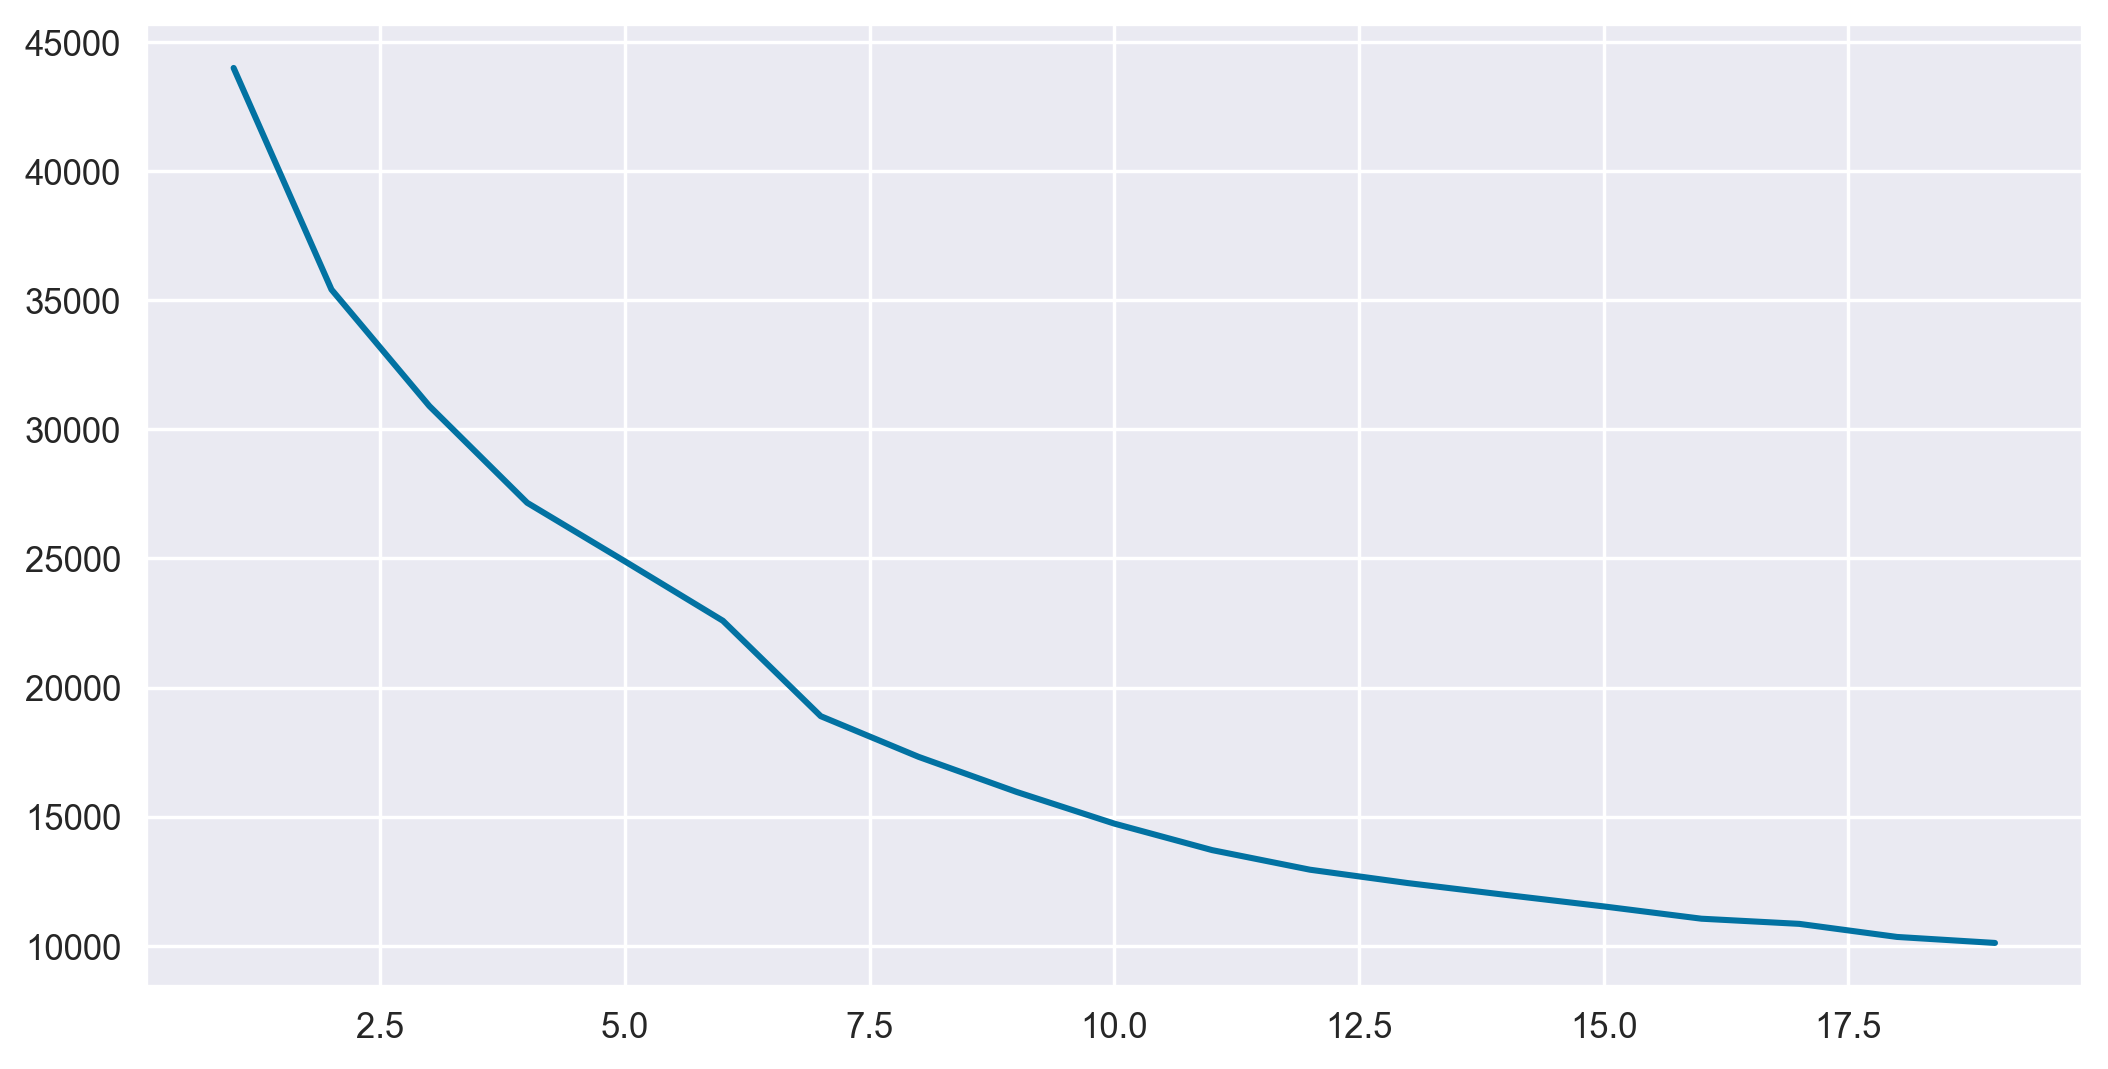

In [53]:
plt.plot(range(1,20), wcss)

- Obervations: In above graph drastical decrease in variance at 2nd cluster. so we will go through the 2 cluster.

In [54]:
#create a model with 2 clusters
model=KMeans(n_clusters=2)
y1=model.fit_predict(x)
y1

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
silhouette_score(x,y1)

0.32542136327826215

In [59]:
df1['Cluster_KMeans']=y1
df1

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  Cluster  Cluster_hc  Cluster_KMeans  
0         0        1           1               0  
1         0        1           1               0  
2         0        1           1               0  
3         0        1           1               0  
4         1        0           0               1  
...     ...      ...         ...             ...  
3994      1        1           1               0  
3995      1        1           1               0  
3996      1        0           0               0  
3997      0        1           1               0  
3998      0        1           1               0  

[3999 rows x 15 columns]

<AxesSubplot:xlabel='Balance', ylabel='Days_since_enroll'>

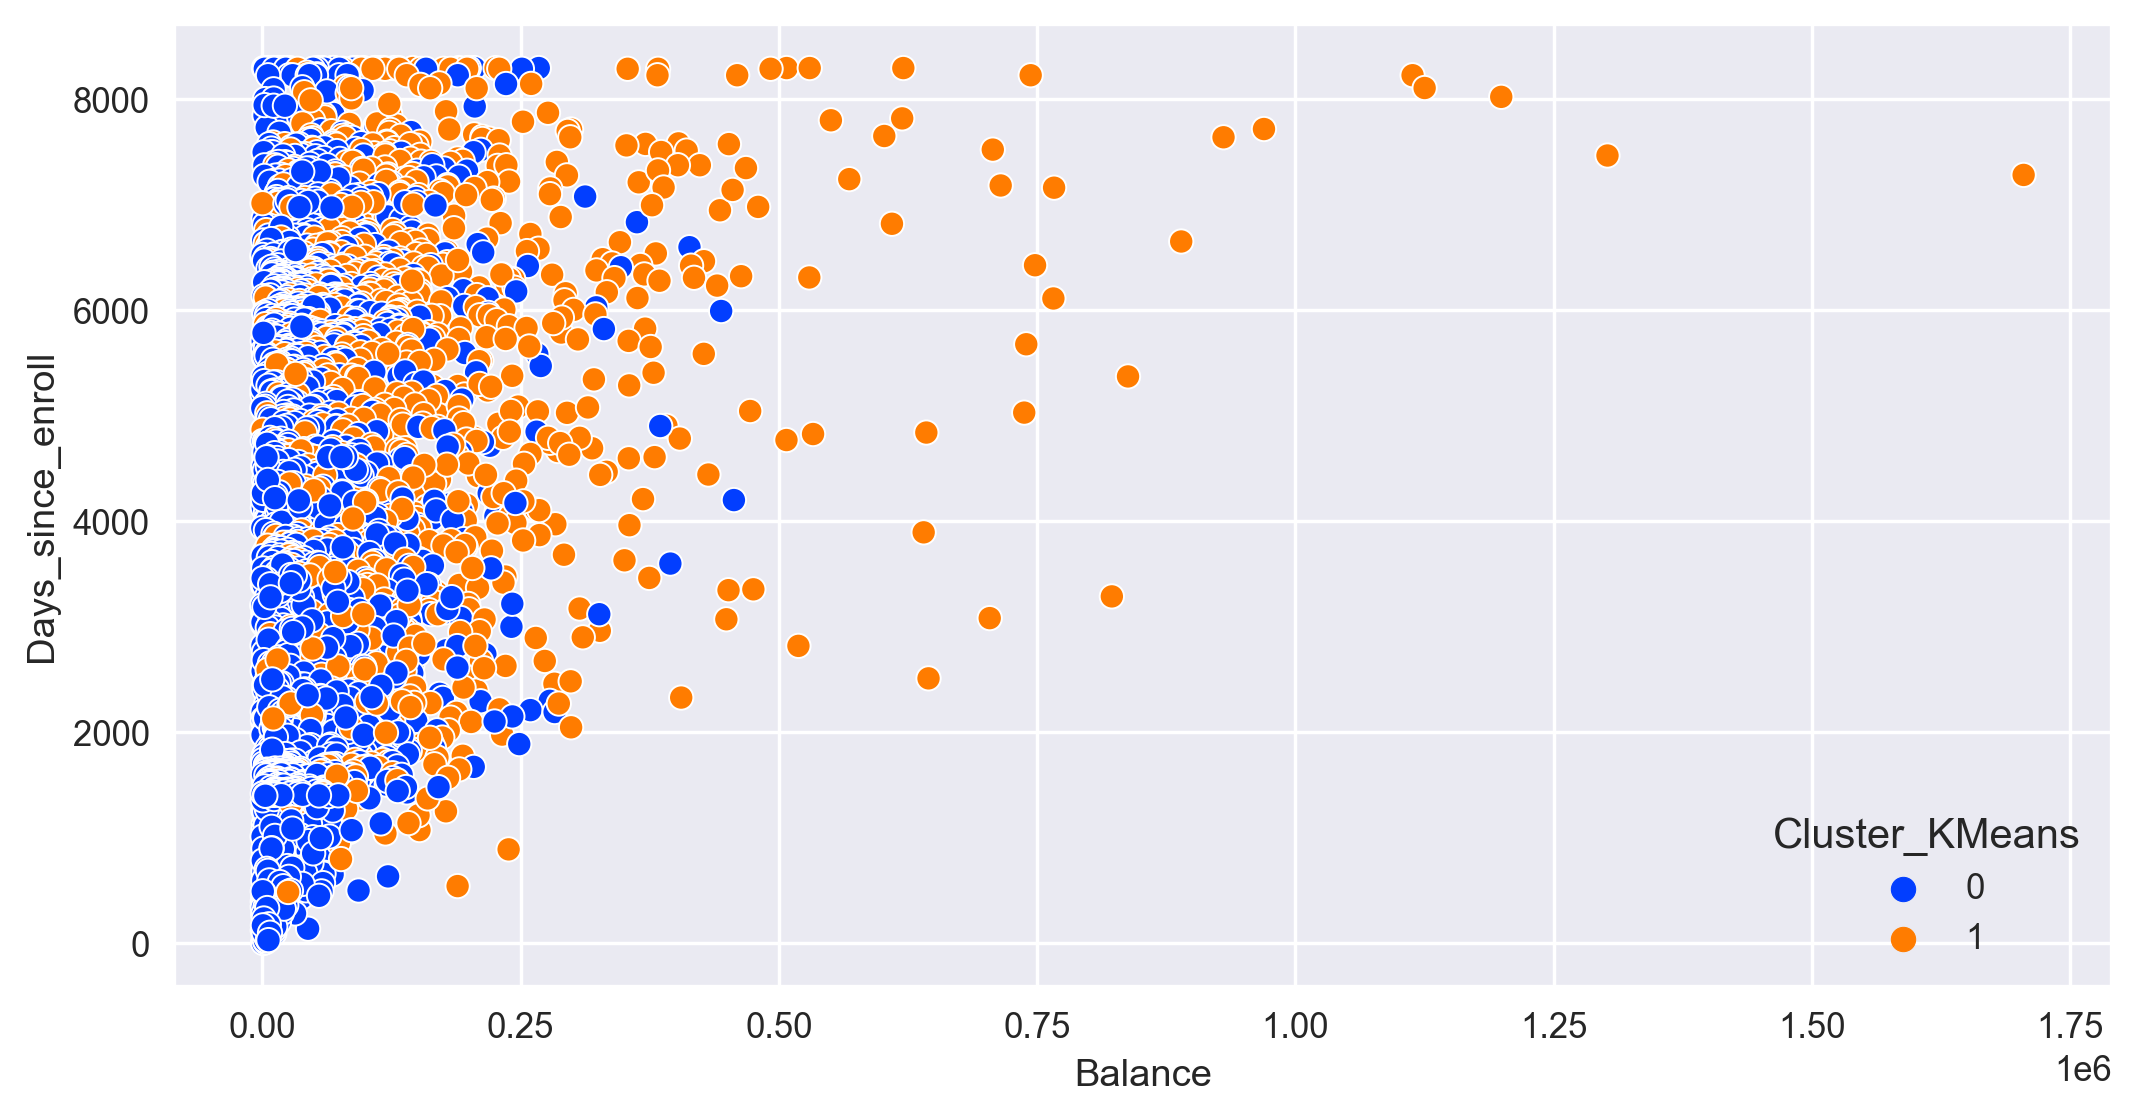

In [60]:
sns.scatterplot(df1['Balance'], df1['Days_since_enroll'],hue=df1['Cluster_KMeans'], palette='bright')

# Evaluation of Kmeans

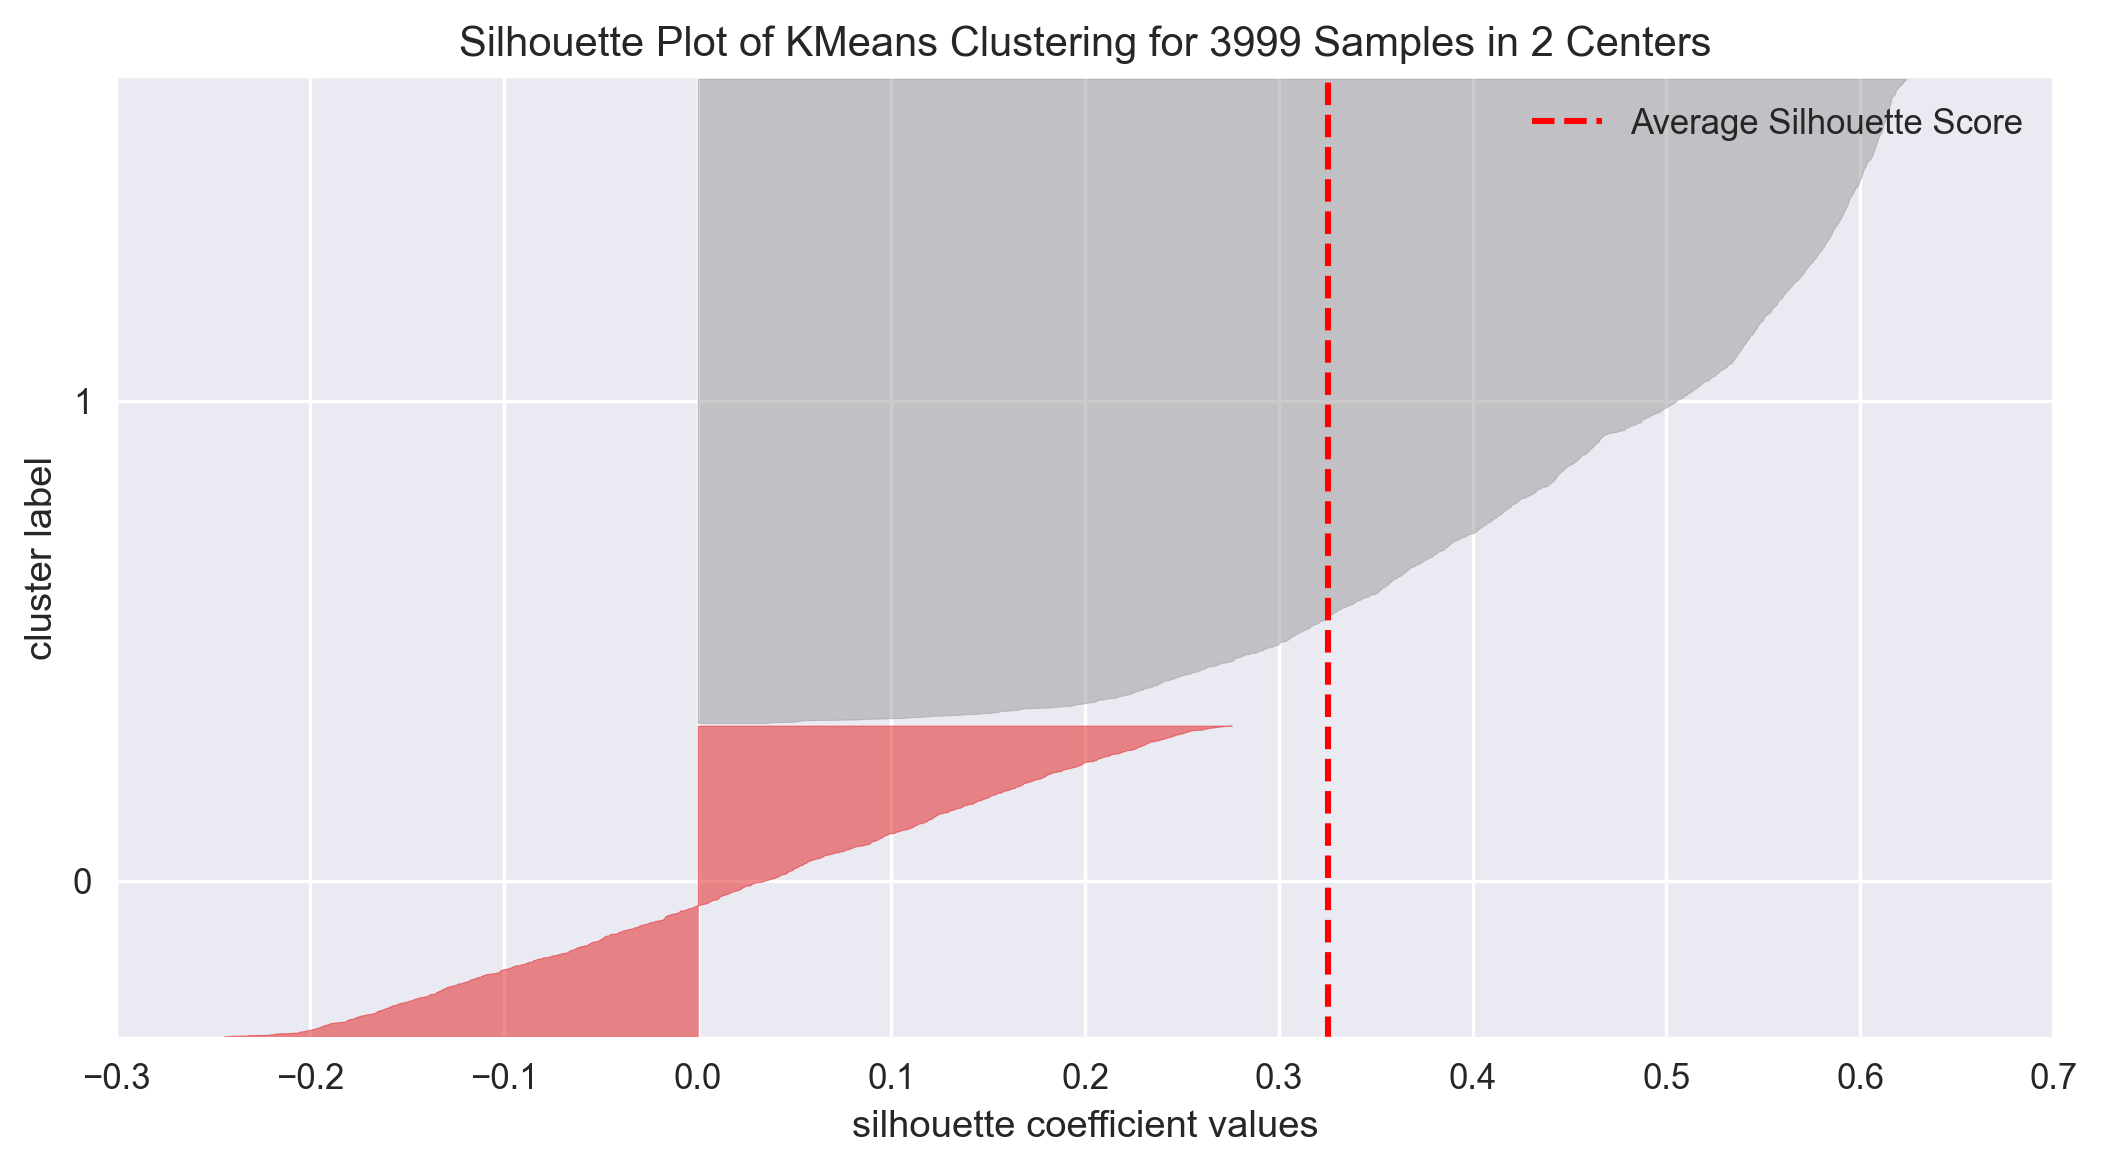

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3999 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [61]:
sv=SilhouetteVisualizer(estimator=KMeans(n_clusters=2))
vis=sv.fit(x)
vis.show()

- Only first cluster is crossing the line of average WCSS and second cluster data points are found at negative side.
- the model is not performing good since score in good.
- we will check for other number of cluster.

In [62]:
sil_score=[]

for i in range(2,20):
    km=KMeans(n_clusters=i)
    y2=km.fit_predict(x)
    sil_score.append(silhouette_score(x,y2))

In [63]:
sil_score

[0.32542136327826215,
 0.3121716765282414,
 0.3097940764442103,
 0.33481131102536954,
 0.28682271367849543,
 0.28371332440773844,
 0.23680303467419028,
 0.29852190358602243,
 0.26212758647767764,
 0.26754201523756393,
 0.2746607203344516,
 0.2689435726467261,
 0.27110428837464107,
 0.26355223171532666,
 0.2688506574230839,
 0.27293874598681084,
 0.2729752777877003,
 0.26879278117402067]

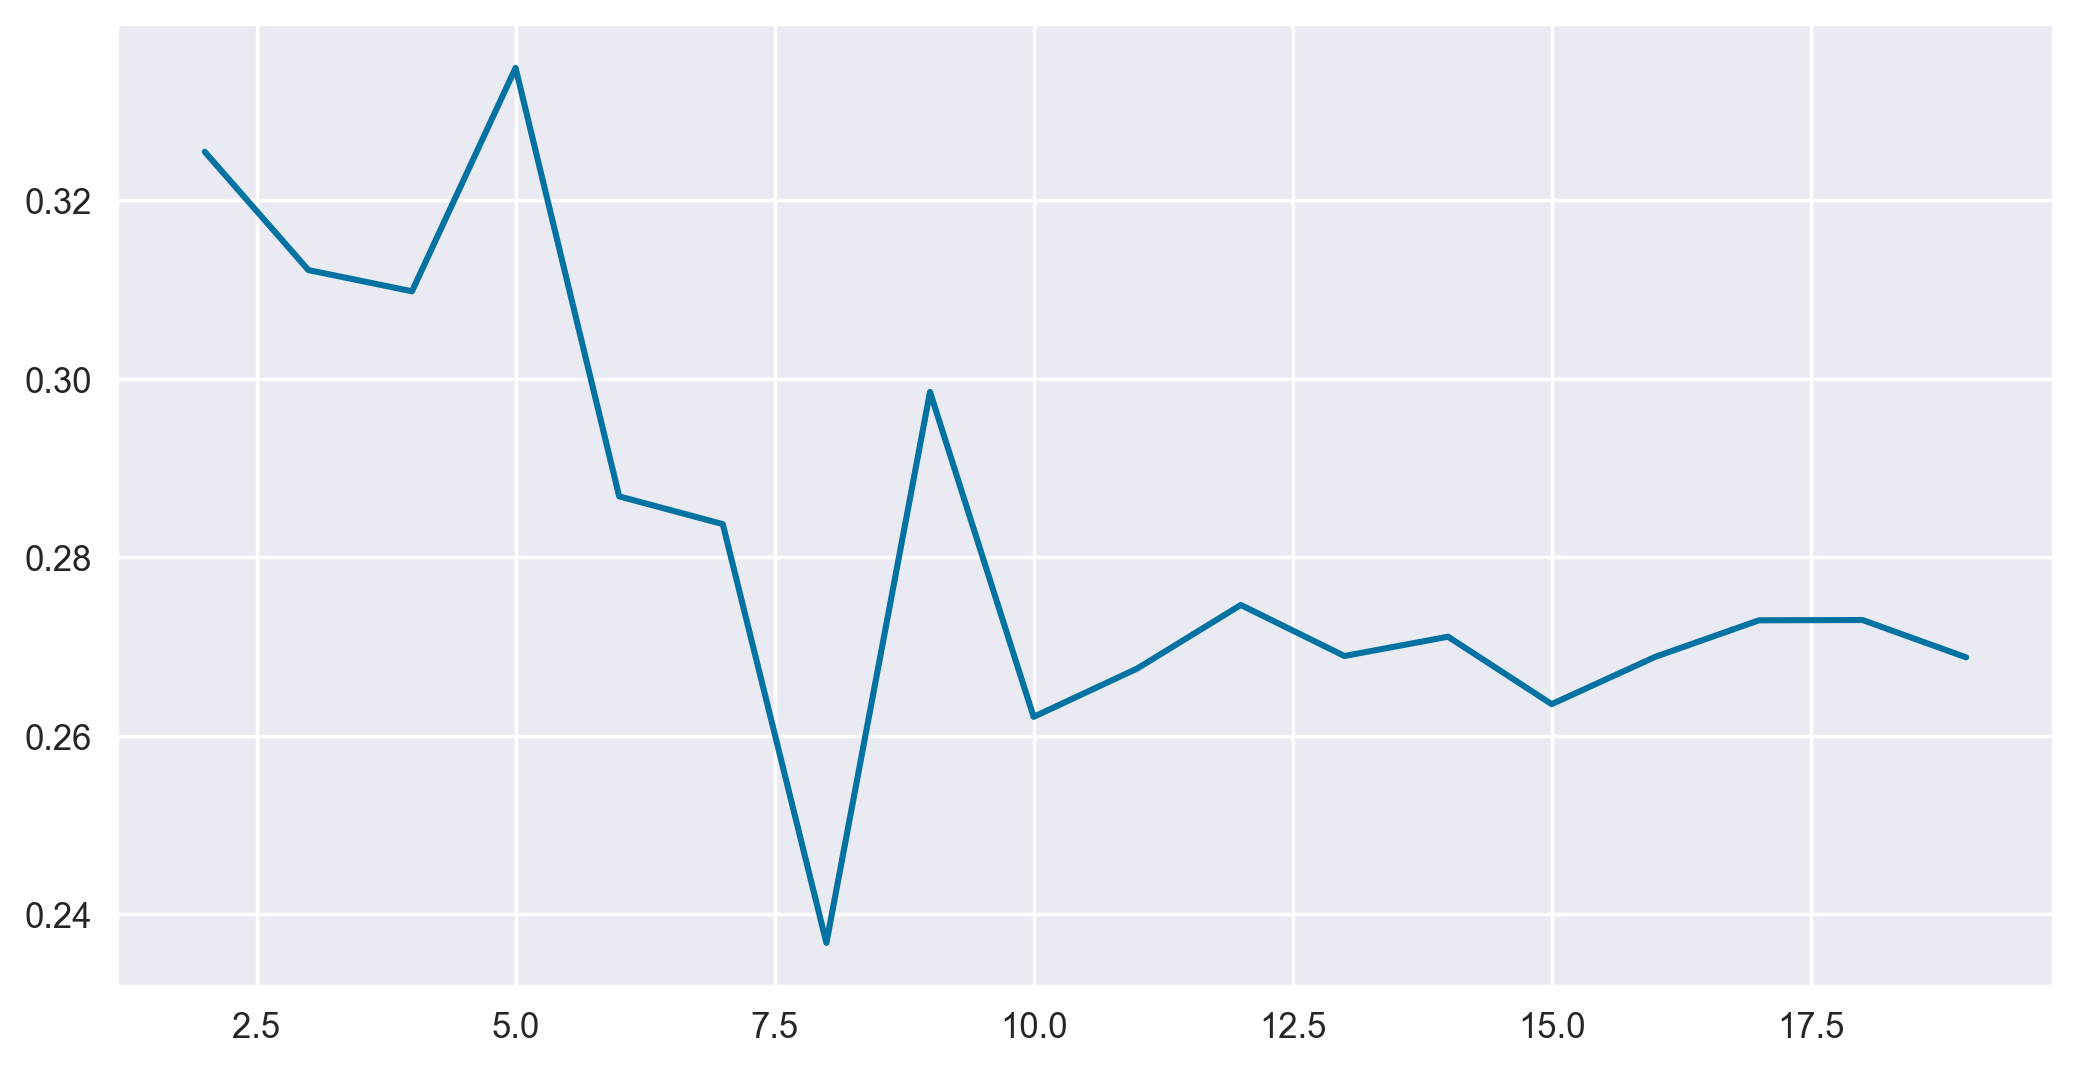

In [64]:
plt.plot(range(2,20),sil_score)

- As the silhouette score for 5 cristals are high as per interpritation of above graph so we will build the final model with five cristal

# Final Model with KMeans Approach

In [65]:
#Create a Final Model with 5 cluster
final_model=KMeans(n_clusters=5)
y_2=final_model.fit_predict(x)
y_2

array([0, 0, 0, ..., 2, 0, 0])

In [66]:
silhouette_score(x,y_2)

0.3238371158691298

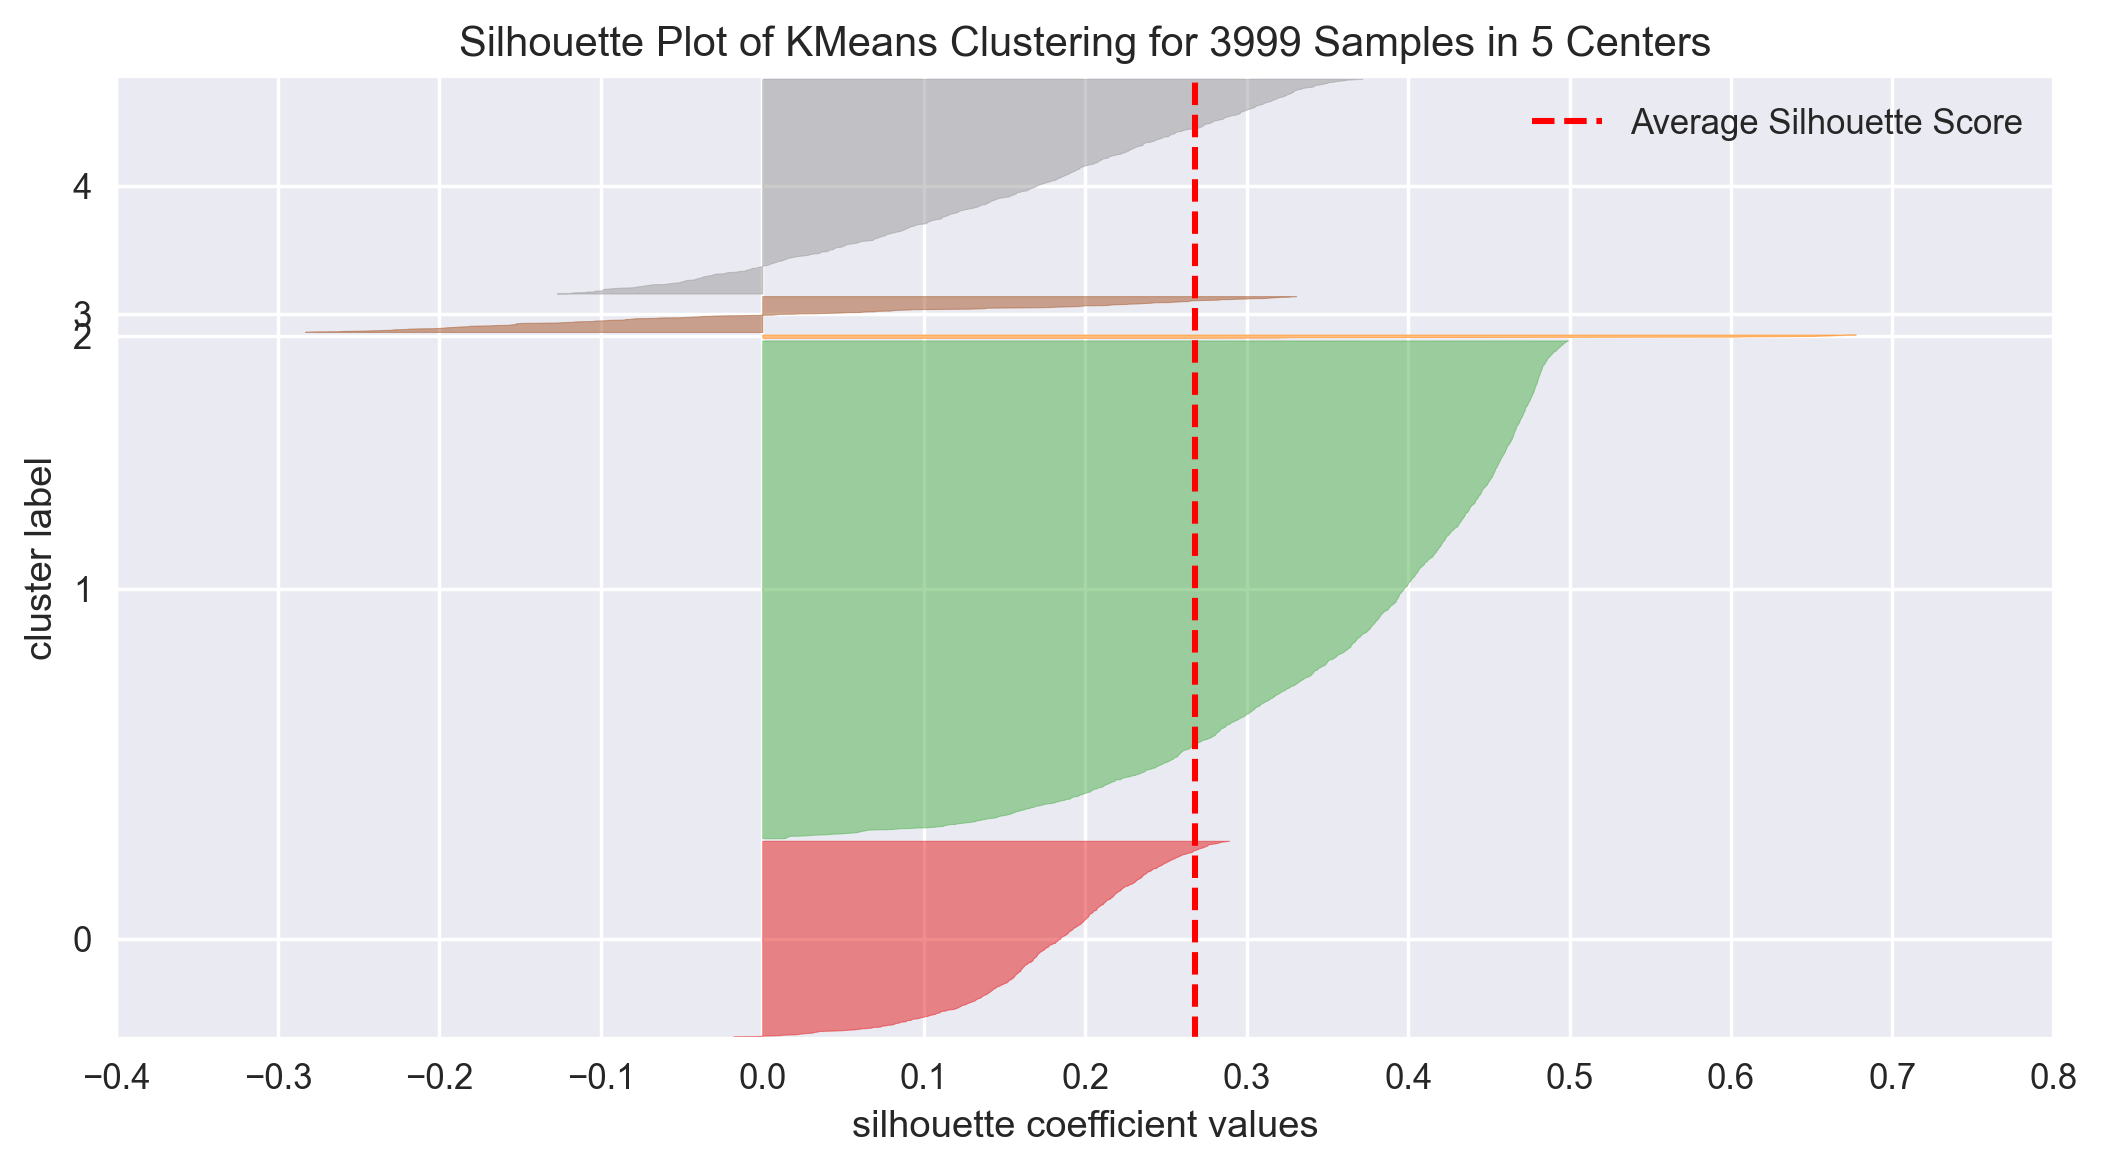

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3999 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [67]:
sv=SilhouetteVisualizer(KMeans(n_clusters=5))
vis=sv.fit(x)
vis.show()

- As obove graph interprotation all cristals are cross the dotted red line i.e average of wcss.
- But cristal 3rd and 4th cristal, some data points are at negative side i.e thay are the outliers.

<AxesSubplot:xlabel='Balance', ylabel='Days_since_enroll'>

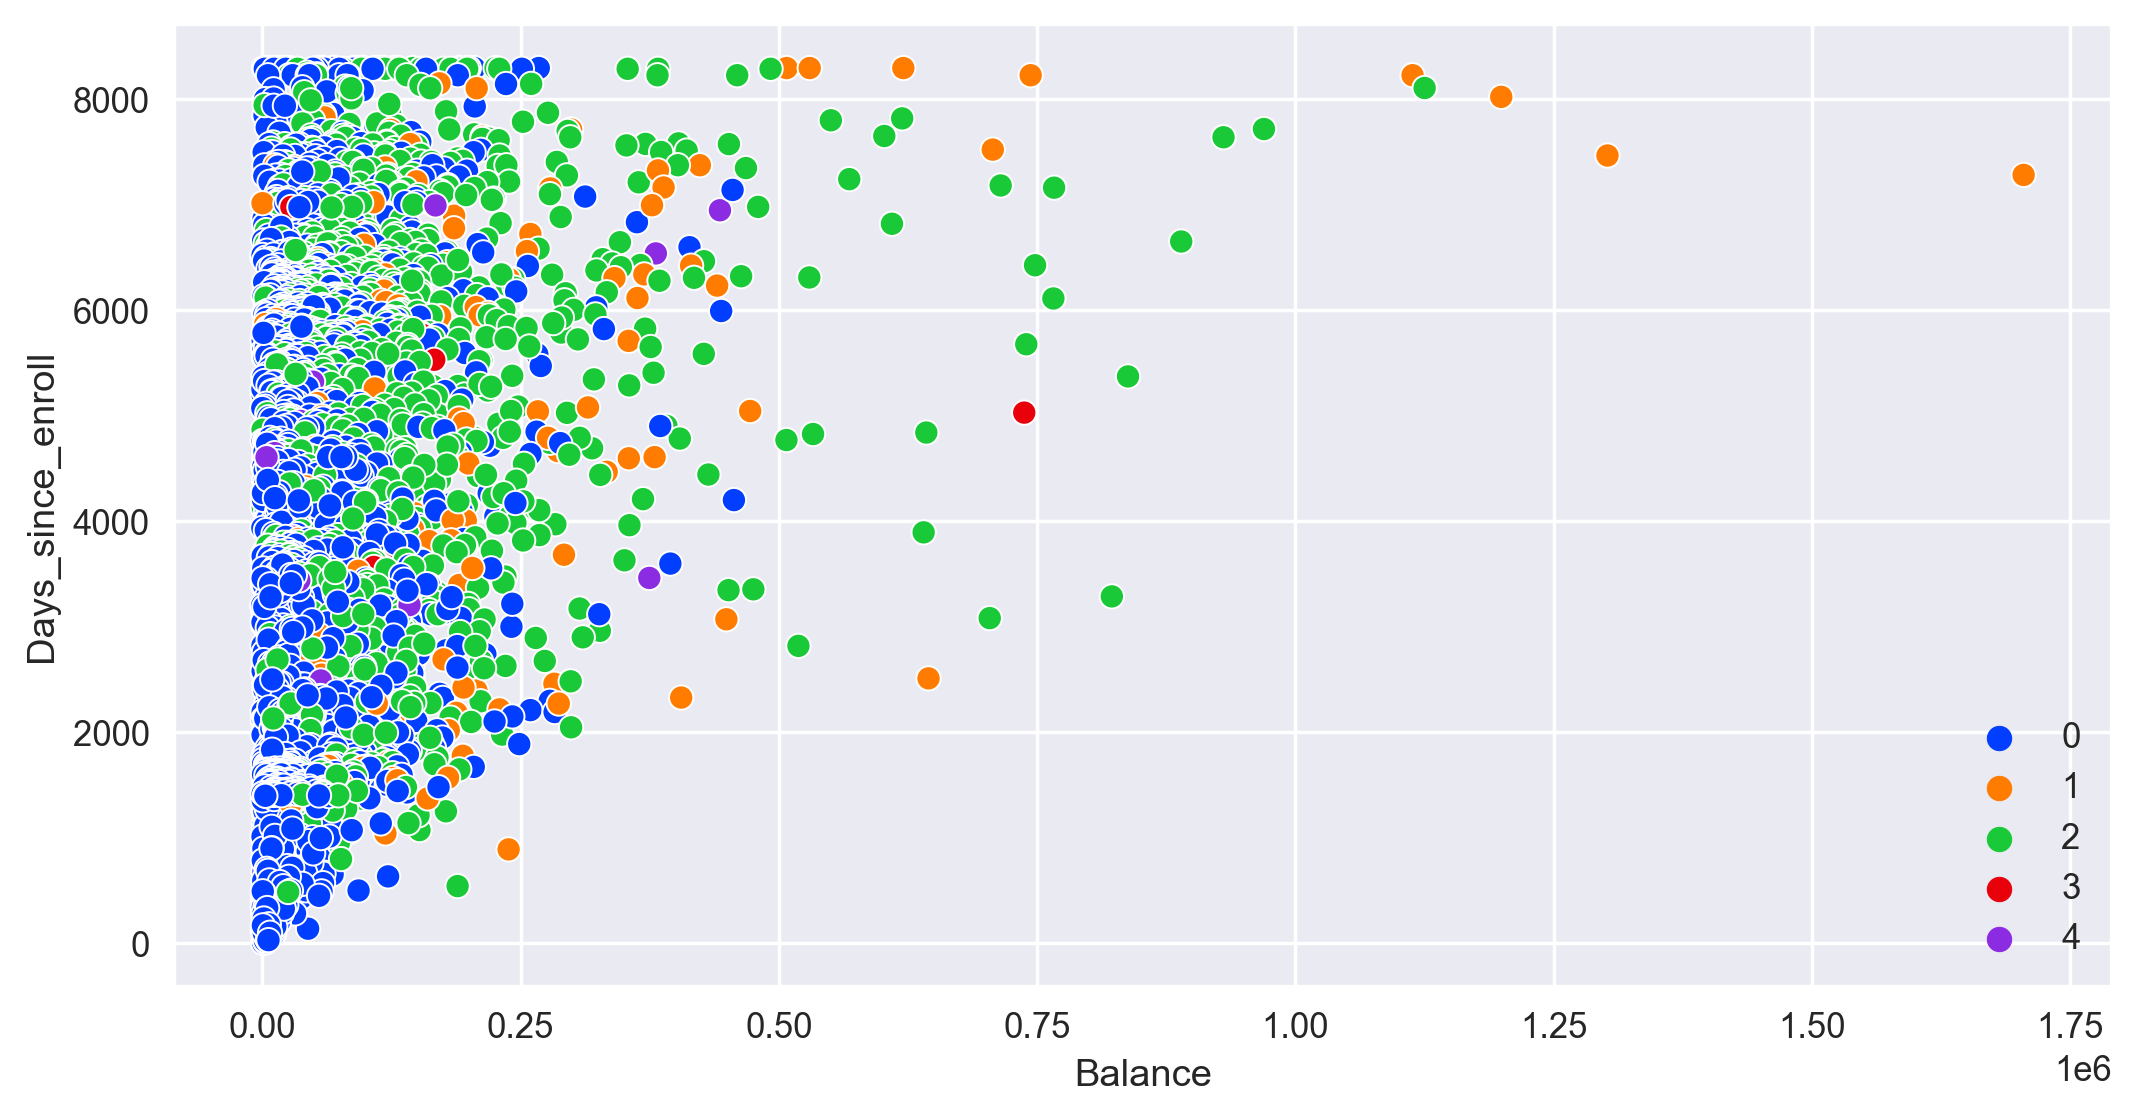

In [68]:
sns.scatterplot(df1['Balance'], df1['Days_since_enroll'],hue=y_2, palette='bright')

# 3. DBSCAN

In [70]:
## First we will create a model by considering the default parameters.
db=DBSCAN()
y3=db.fit_predict(x)
y3

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [71]:
#calculate the model accuracy
silhouette_score(x,y3)

-0.07834757831741164

###### As from silhouette score the accurancy negative.i.e Model is worst

## Hyperparameter Tuning

### Finding out best Epsilon Value(K Distance Plot)

In [74]:
neigh=NearestNeighbors(n_neighbors=22).fit(x)
dist,index=neigh.kneighbors(x)

In [75]:
dist

array([[0.        , 0.11184685, 0.12034246, ..., 0.19904688, 0.20851141,
        0.21221566],
       [0.        , 0.11406276, 0.11437601, ..., 0.24517849, 0.24856551,
        0.2504774 ],
       [0.        , 0.16540223, 0.19458949, ..., 0.38398721, 0.38849003,
        0.3958009 ],
       ...,
       [0.        , 0.16614779, 0.28024323, ..., 0.94512984, 0.9503377 ,
        0.99918221],
       [0.        , 0.25725534, 0.27167409, ..., 0.5050608 , 0.50628085,
        0.50706514],
       [0.        , 0.00270574, 0.0112955 , ..., 0.13143087, 0.13297814,
        0.1330419 ]])

In [76]:
#convert dist in a dataframe
pd.DataFrame(dist)

0         1         2         3         4         5         6   \
0     0.0  0.111847  0.120342  0.135354  0.137432  0.143448  0.149689   
1     0.0  0.114063  0.114376  0.134523  0.137432  0.143301  0.149286   
2     0.0  0.165402  0.194589  0.198489  0.219357  0.259108  0.296328   
3     0.0  0.048375  0.058575  0.107532  0.111085  0.111630  0.111814   
4     0.0  0.545493  0.735055  0.786488  1.034848  1.182568  1.185210   
...   ...       ...       ...       ...       ...       ...       ...   
3994  0.0  0.288941  0.335142  0.374175  0.408456  0.411451  0.421576   
3995  0.0  0.312801  0.343099  0.377047  0.422574  0.435255  0.443673   
3996  0.0  0.166148  0.280243  0.535330  0.598132  0.722989  0.759092   
3997  0.0  0.257255  0.271674  0.329126  0.358886  0.447227  0.452537   
3998  0.0  0.002706  0.011296  0.015290  0.023301  0.040503  0.059182   

            7         8         9   ...        12        13        14  \
0     0.153497  0.158812  0.160266  ...  0.172035  0.172957  0.174545   
1     0.169212  0.192101  0.210719  ...  0.215619  0.217939  0.218608   
2     0.303075  0.306914  0.321574  ...  0.347289  0.348493  0.357428   
3     0.114063  0.123389  0.132398  ...  0.139013  0.139893  0.150304   
4     1.209658  1.229741  1.240997  ...  1.288365  1.319384  1.392137   
...        ...       ...       ...  ...       ...       ...       ...   
3994  0.443389  0.474921  0.476695  ...  0.489600  0.493388  0.498288   
3995  0.454709  0.461673  0.471964  ...  0.502872  0.532144  0.536353   
3996  0.770030  0.771669  0.789086  ...  0.897245  0.902396  0.920652   
3997  0.457741  0.465214  0.470719  ...  0.485476  0.492351  0.497208   
3998  0.061950  0.063848  0.086638  ...  0.098429  0.101215  0.106087   

            15        16        17        18        19        20        21  
0     0.175294  0.175738  0.190445  0.196209  0.199047  0.208511  0.212216  
1     0.225770  0.228564  0.232797  0.239714  0.245178  0.248566  0.250477  
2     0.364434  0.376387  0.376573  0.383882  0.383987  0.388490  0.395801  
3     0.172061  0.180322  0.190775  0.200492  0.213414  0.224065  0.224068  
4     1.397882  1.411023  1.423736  1.441230  1.442506  1.458099  1.492617  
...        ...       ...       ...       ...       ...       ...       ...  
3994  0.501394  0.504065  0.508984  0.513660  0.516704  0.528400  0.535410  
3995  0.563756  0.582212  0.584369  0.585646  0.588749  0.590799  0.599480  
3996  0.923932  0.937209  0.944191  0.944441  0.945130  0.950338  0.999182  
3997  0.497362  0.504174  0.504880  0.505034  0.505061  0.506281  0.507065  
3998  0.109219  0.110445  0.127092  0.129699  0.131431  0.132978  0.133042  

[3999 rows x 22 columns]

In [77]:
#Sort a distance in assending order and we will select the 1st nearest neighbor
dist=np.sort(dist[:,1], axis=0)     #axis is 0 as we are soring the column wise or else it is 1.
dist

array([0.00000000e+00, 0.00000000e+00, 2.26431613e-03, ...,
       6.61657940e+00, 6.67864158e+00, 7.46132314e+00])

Text(0.5, 1.0, 'K-dist Plot')

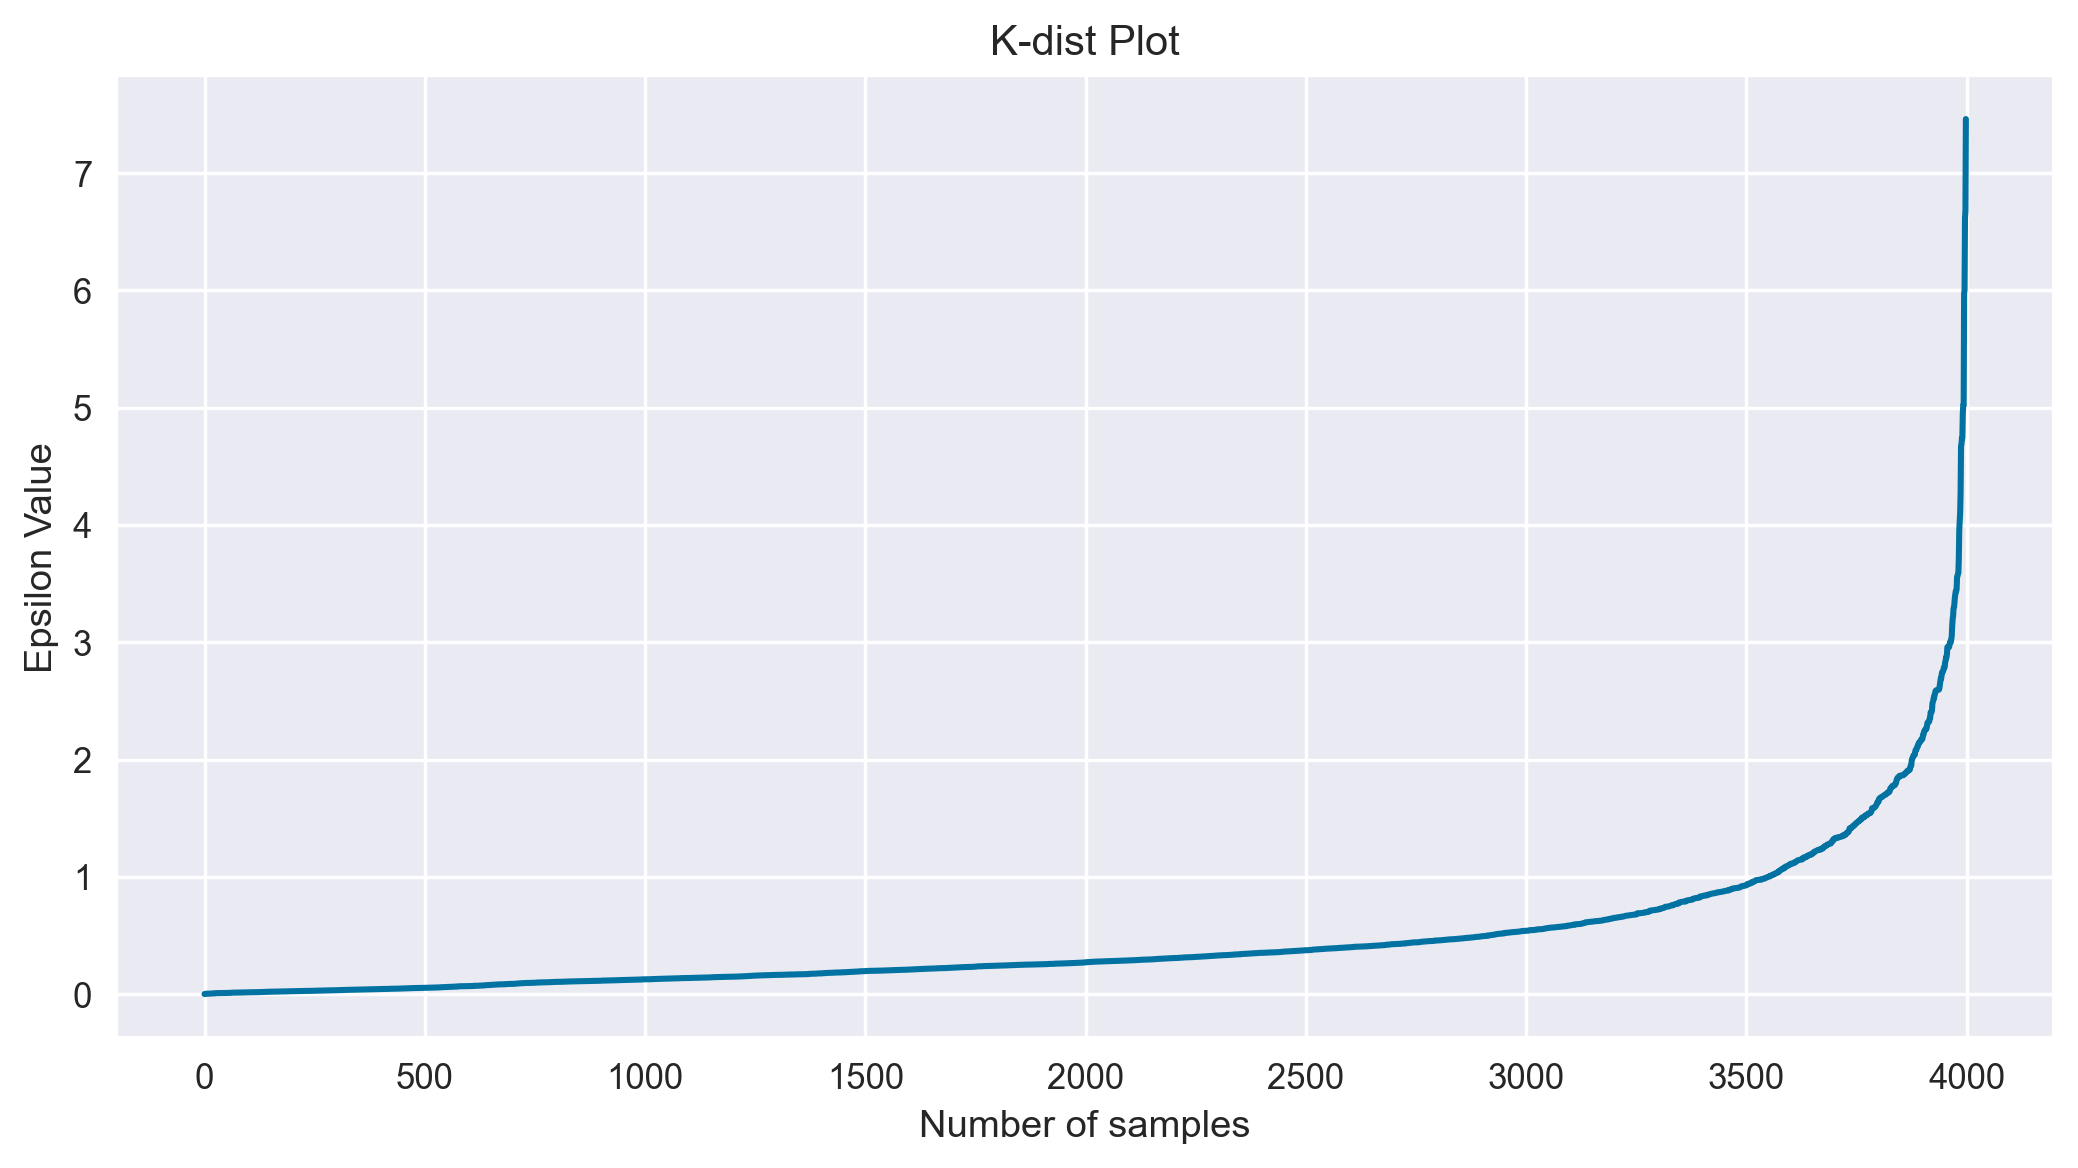

In [78]:
#plot the graph for distance
sns.set_style('darkgrid')
plt.plot(dist)
plt.xlabel('Number of samples')
plt.ylabel('Epsilon Value')
plt.title('K-dist Plot')

In [87]:
# we will check the epsilon value for 2
model=DBSCAN(eps=2.5, min_samples=22)
y_4=model.fit_predict(x)
y_4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
silhouette_score(x,y_4)

0.6310507591790085

In [91]:
#Add a cluster label in a dataset
df1['cluster_DBSCAN']=y_4
df1

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  Cluster  Cluster_hc  Cluster_KMeans  cluster_DBSCAN  
0         0        1           1               0               0  
1         0        1           1               0               0  
2         0        1           1               0               0  
3         0        1           1               0               0  
4         1        0           0               1               0  
...     ...      ...         ...             ...             ...  
3994      1        1           1               0               0  
3995      1        1           1               0               0  
3996      1        0           0               0               0  
3997      0        1           1               0               0  
3998      0        1           1               0               0  

[3999 rows x 16 columns]

<AxesSubplot:xlabel='Balance', ylabel='Days_since_enroll'>

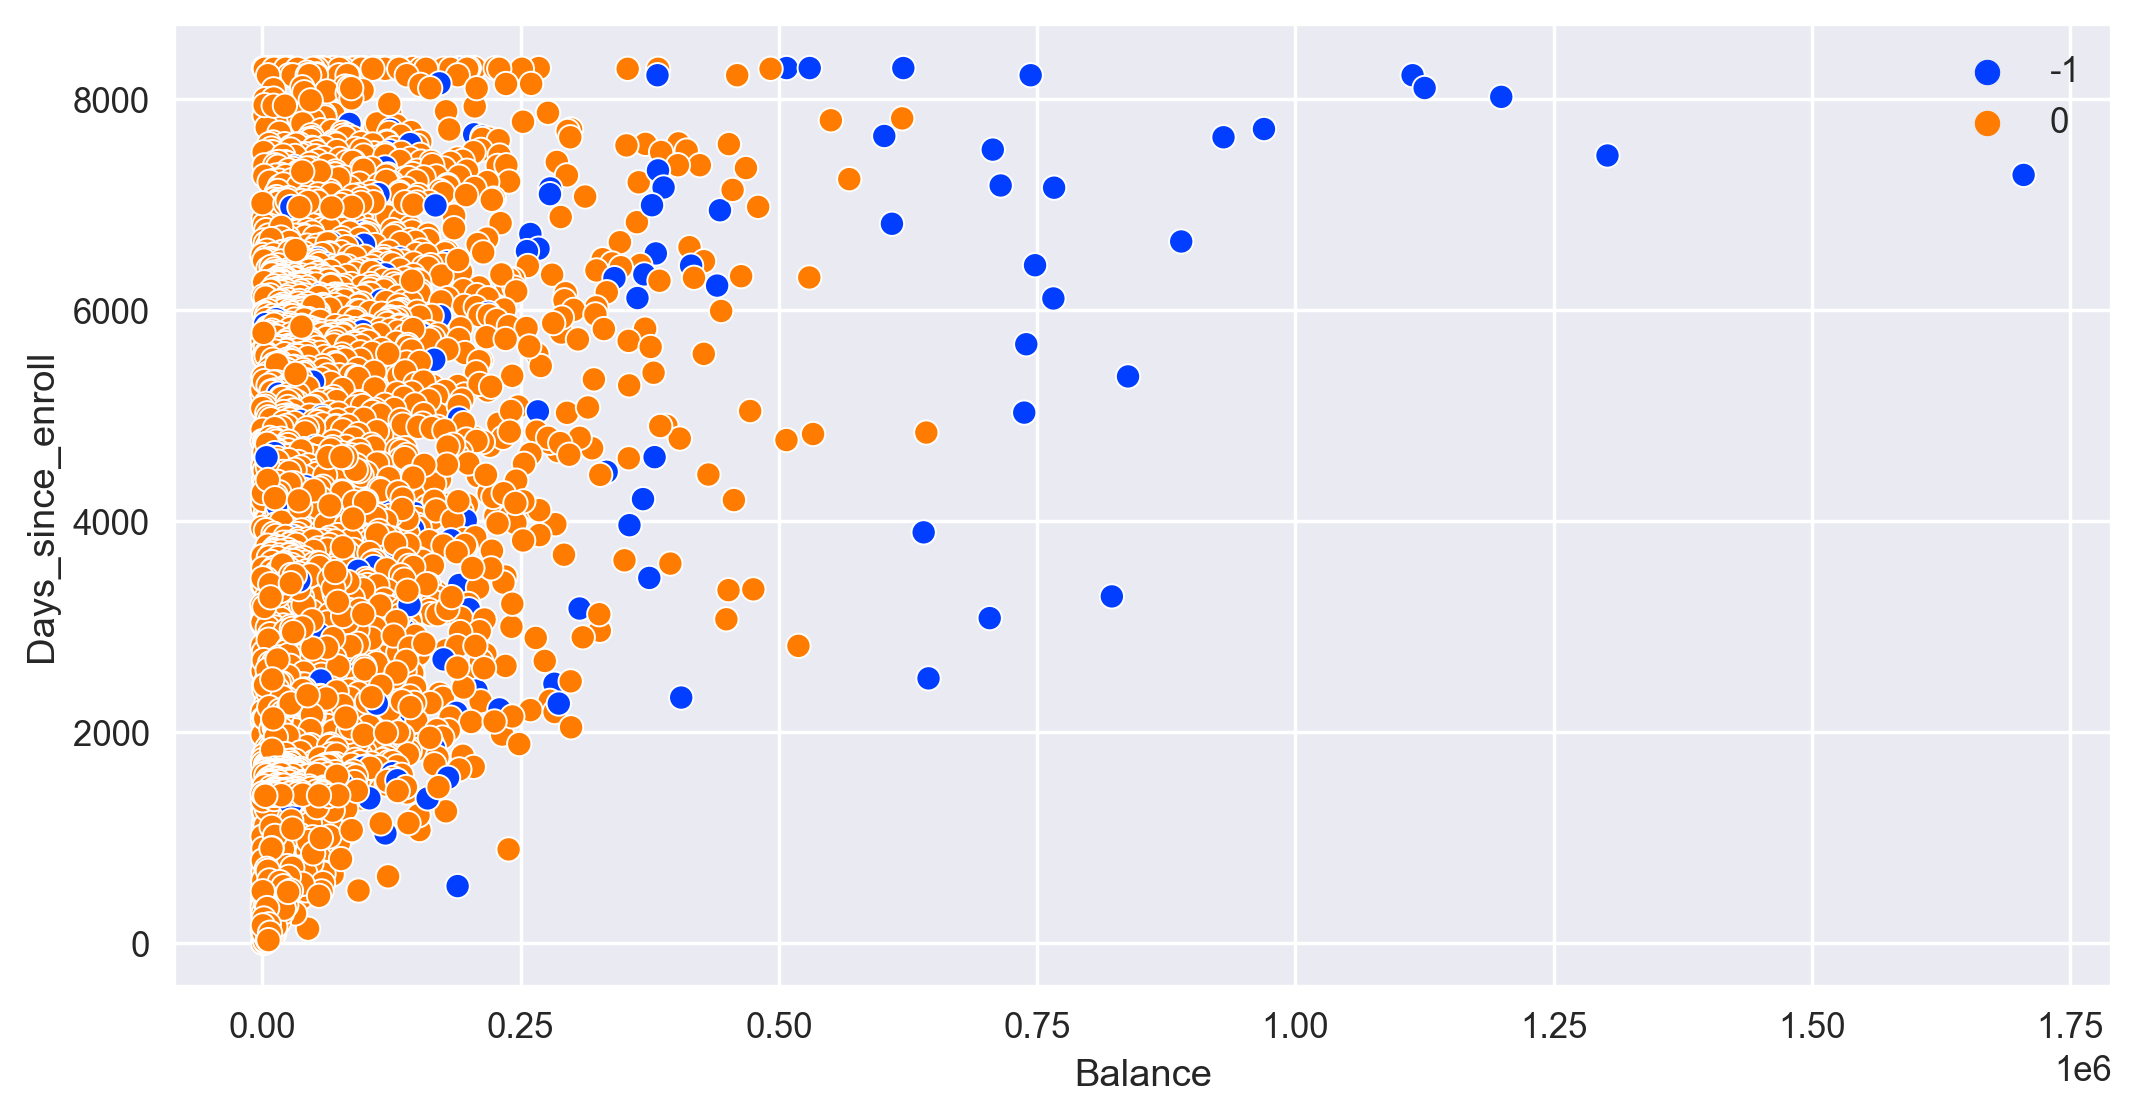

In [94]:
sns.scatterplot(df1['Balance'], df1['Days_since_enroll'],hue=y_4, palette='bright')

# Inferences

## Hierarchical Clustering
- In a hierarchical clustering we form the 4 clusters by cutting the dendrograme.
- In a hierarchical clustering silhouette_score is 0.308.
- we cannot detect the outliers.

## KMeans Clustering¶
- In a KMeans clustering we form the 5 clusters by doing the hyperparameter tuning to get the optimum number of cluster as well as best silhouette score.
- In a KMeans clustering silhouette_score is 0.323.
- we cannot detect the outliers.

## DBSCAN Clustering¶
- In a DBSCAN clustering we form the single clusters by doing the hyperparameter tuning to get the appropriate value of epsilon.
- In a DBSCAN clustering silhouette_score is 0.631.
- we have detected the outlier here.